In [1]:
import uproot as ur
import zfit
from zfit import z
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from utils.getPreselection import *
import pandas as pd
from matplotlib import pylab
from utils.plotFunctions import *
import mplhep
mplhep.set_style('LHCb2')

In [2]:
year=2018
PATH_MC='/disk/lhcb_data/davide/RKHighq2/tuples/'+str(year)+'/MC/KeeTuples/truthed/'
PATH_Data='/disk/lhcb_data/davide/RKHighq2/tuples/'+str(year)+'/data/KeeTuples/HltTOS/'

obs = zfit.Space('B_plus_M', (4980,6200))

In [3]:
cut=0.22


In [4]:
preselStringNoPid=getCommonPreselNoPidCutRun2().replace('&&','and').replace('TMath::Abs','abs').replace('||','or')
preselString=getCommonPreselRun2().replace('&&','and').replace('TMath::Abs','abs').replace('||','or')
preselString=preselString.replace('e_minus_PIDe>3','e_minus_PIDe>4').replace('e_plus_PIDe>3','e_plus_PIDe>4')

HltTOSString = getFullHltRun2().replace('&&','and').replace('||','or').replace('TOS','TOS==1.')

q2Cut = "J_psi_1S_TRACK_M*J_psi_1S_TRACK_M > 14e6"
trigCut= "passTrigCat0==1"
massRangeCut= "B_plus_M>4980 and B_plus_M<6200"
massRangeCutExt = "B_plus_M>4600 and B_plus_M<6200"
BDTCut = "BDT_score_selection>"+str(cut)
blindRangeCut="(B_plus_M>5400 and B_plus_M<6200)"

In [5]:
tupleMCName='Kee_'+str(year)+'_truthed_bdt_reduced.root'
fileMC = ur.open(PATH_MC+tupleMCName)
treeMC=fileMC['DecayTree']

KeeMC=treeMC.arrays(library='pd', filter_name=branches)
KeeMC*=1.

KeeMC_CommonPresel = KeeMC.query(preselStringNoPid)
KeeMC_HltTOS = KeeMC_CommonPresel.query(HltTOSString)
KeeMC_trig0 = KeeMC_HltTOS.query(q2Cut+" and "+trigCut+" and "+massRangeCut+ " and "+BDTCut)

In [6]:
KeeMC_trig0photon0 = KeeMC_trig0.query("(e_plus_HasBremAdded + e_minus_HasBremAdded) == 0")
KeeMC_trig0photon1 = KeeMC_trig0.query("(e_plus_HasBremAdded + e_minus_HasBremAdded) == 1")
KeeMC_trig0photon2 = KeeMC_trig0.query("(e_plus_HasBremAdded + e_minus_HasBremAdded) == 2")


In [7]:
#mplhep.histplot(plt.hist(KeeMC_trig0['B_plus_M'], weights=KeeMC_trig0['PIDWeight_DLL3']*KeeMC_trig0['KinWeight_MUTOS2DNTracks'], bins=80,log=True, facecolor="none"), 
#                yerr=True, color='red', histtype='errorbar')
#mplhep.histplot(plt.hist(KeeMC_trig0['B_plus_M'], weights=KeeMC_trig0['PIDWeight_DLL4']*KeeMC_trig0['KinWeight_MUTOS2DNTracks'], bins=80,log=True, facecolor="none"), 
#                yerr=True, color='blue', histtype='errorbar')

In [8]:
f0g=len(KeeMC_trig0photon0)/len(KeeMC_trig0)
f1g=len(KeeMC_trig0photon1)/len(KeeMC_trig0)

In [9]:
B_plus_M0 = zfit.Data.from_numpy(obs=obs, weights=KeeMC_trig0photon0['PIDWeight_DLL4']*KeeMC_trig0photon0['KinWeight_MUTOS2DNTracks'], array=KeeMC_trig0photon0['B_plus_M'].to_numpy())
B_plus_M1 = zfit.Data.from_numpy(obs=obs, weights=KeeMC_trig0photon1['PIDWeight_DLL4']*KeeMC_trig0photon1['KinWeight_MUTOS2DNTracks'], array=KeeMC_trig0photon1['B_plus_M'].to_numpy())
B_plus_M2 = zfit.Data.from_numpy(obs=obs, weights=KeeMC_trig0photon2['PIDWeight_DLL4']*KeeMC_trig0photon2['KinWeight_MUTOS2DNTracks'], array=KeeMC_trig0photon2['B_plus_M'].to_numpy())


In [10]:
nPhotons=0
mean0 = zfit.Parameter("mean"+str(nPhotons), 5280, 5000, 5500)
sigma0 = zfit.Parameter("sigma"+str(nPhotons), 25, 7, 50)
sigma20 = zfit.Parameter("sigma2"+str(nPhotons), 50, 7, 200)


alpha_left0 = zfit.Parameter("alpha_right_"+str(nPhotons), .1, .01, 2)
alpha_right0 = zfit.Parameter("alpha_left_"+str(nPhotons), -.1, -2, -.01)
n_left0 = zfit.Parameter("n_left_"+str(nPhotons), 2, 7, 20)
n_right0 = zfit.Parameter("n_right_"+str(nPhotons), 2, 7, 20)

fracCB0 = zfit.Parameter("fracCB"+str(nPhotons), 0.66, 0.00001, 0.99999)
cb10 = zfit.pdf.CrystalBall(obs=obs, mu=mean0, sigma=sigma0, alpha=alpha_left0, n=n_left0)
cb20 = zfit.pdf.CrystalBall(obs=obs, mu=mean0, sigma=sigma20, alpha=alpha_right0, n=n_right0)
sigModel0 = zfit.pdf.SumPDF([cb10, cb20], [fracCB0])



nPhotons=1
mean1 = zfit.Parameter("mean"+str(nPhotons), 5280, 5000, 5500)
sigma1 = zfit.Parameter("sigma"+str(nPhotons), 30, 7, 50)
sigma21 = zfit.Parameter("sigma2"+str(nPhotons), 50, 7, 100)


alpha_left1 = zfit.Parameter("alpha_right_"+str(nPhotons), .1, .001, 2)
alpha_right1 = zfit.Parameter("alpha_left_"+str(nPhotons), -.1, -2, -.001)
n_left1 = zfit.Parameter("n_left_"+str(nPhotons), 2, 7, 25)
n_right1 = zfit.Parameter("n_right_"+str(nPhotons), 2, 7, 25)


sigma31 = zfit.Parameter("sigmaGaus3"+str(nPhotons),100, 10 , 2000)
fracGaus1 = zfit.Parameter("fracGaus"+str(nPhotons), 0.50, 0.0001, 0.999)
fracCB1 = zfit.Parameter("fracCB"+str(nPhotons), 0.66, 0.00001, 0.99999)
cb11 = zfit.pdf.CrystalBall(obs=obs, mu=mean1, sigma=sigma1, alpha=alpha_left1, n=n_left1)
cb21 = zfit.pdf.CrystalBall(obs=obs, mu=mean1, sigma=sigma21, alpha=alpha_right1, n=n_right1)
sigGaus1 = zfit.pdf.Gauss(obs=obs, mu=mean1, sigma=sigma31)

sigModelCB1 = zfit.pdf.SumPDF([cb11, cb21], [fracCB1])
sigModel1 = zfit.pdf.SumPDF([sigModelCB1,sigGaus1],[fracGaus1])



nPhotons=2
mean2 = zfit.Parameter("mean"+str(nPhotons), 5280, 5000, 5500)
sigma2 = zfit.Parameter("sigma"+str(nPhotons), 50, 7, 100)
sigma22 = zfit.Parameter("sigma2"+str(nPhotons), 50, 7, 100)

alpha_left2 = zfit.Parameter("alpha_right_"+str(nPhotons), .1, .001, 2)
alpha_right2 = zfit.Parameter("alpha_left_"+str(nPhotons), -.1, -2, -.001)
n_left2 = zfit.Parameter("n_left_"+str(nPhotons), 2, 7, 25)
n_right2 = zfit.Parameter("n_right_"+str(nPhotons), 2, 7, 25)

sigma32 = zfit.Parameter("sigmaGaus3"+str(nPhotons),100, 10 , 2000)
fracGaus2 = zfit.Parameter("fracGaus"+str(nPhotons), 0.50, 0.0001, 0.999)

fracCB2 = zfit.Parameter("fracCB"+str(nPhotons), 0.66, 0.00001, 0.99999)
cb12 = zfit.pdf.CrystalBall(obs=obs, mu=mean2, sigma=sigma2, alpha=alpha_left2, n=n_left2)
cb22 = zfit.pdf.CrystalBall(obs=obs, mu=mean2, sigma=sigma22, alpha=alpha_right2, n=n_right2)
sigGaus2 = zfit.pdf.Gauss(obs=obs, mu=mean2, sigma=sigma32)

sigModelCB2 = zfit.pdf.SumPDF([cb12, cb22], [fracCB2])
sigModel2 = zfit.pdf.SumPDF([sigModelCB2,sigGaus2],[fracGaus2])




In [11]:
nll0 = zfit.loss.UnbinnedNLL(sigModel0, B_plus_M0)
nll1 = zfit.loss.UnbinnedNLL(sigModel1, B_plus_M1)
nll2 = zfit.loss.UnbinnedNLL(sigModel2, B_plus_M2)

In [12]:
minimizer = zfit.minimize.Minuit(use_minuit_grad=True, minimize_strategy=2, verbosity=6)

In [13]:
result0 = minimizer.minimize(nll0)
result1 = minimizer.minimize(nll1)
result2 = minimizer.minimize(nll2)

/disk/lhcb_data/davide/miniconda3/envs/zfit_env/lib/python3.8/site-packages/zfit/util/cache.py:283: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return all(np.equal(self.immutable_representation, other.immutable_representation))


W MnPosDef Matrix forced pos-def by adding to diagonal 0.472842
W MnPosDef Matrix forced pos-def by adding to diagonal 2.77527
W MnPosDef Matrix forced pos-def by adding to diagonal 0.112426
W VariableMetricBuilder Reached machine accuracy limit; Edm 0.00140775 is smaller than machine limit 0.00206894 while 0.001 was requested
W MnPosDef Matrix forced pos-def by adding to diagonal 0.320542
W DavidonErrorUpdator delgam < 0 : first derivatives increasing along search line
W VariableMetricBuilder Matrix not pos.def., try to make pos.def.
W MnPosDef non-positive diagonal element in covariance matrix[ 2 ] = -0.0526443
W MnPosDef non-positive diagonal element in covariance matrix[ 9 ] = -0.000109235
W MnPosDef Added to diagonal of Error matrix a value 0.552645
W MnPosDef non-positive diagonal element in covariance matrix[ 4 ] = -0.151736
W MnPosDef Added to diagonal of Error matrix a value 0.651737


In [14]:
plot_model(sigModel0,B_plus_M0, save_plot=True, fileName='brutto.png')

/home/hep/davide/RKHighq2/sensitivity_studies/utils/plotFunctions.py:27: UserWarning: The function <function Space.limit1d at 0x7fbf6b737430> may does not return the actual area/limits but rather the rectangular limits. <zfit Space obs=('B_plus_M',), axes=(0,), limits=(array([[4980.]]), array([[6200.]]))> can also have functional limits that are arbitrarily defined and lay inside the rect_limits. To test if a value is inside, use `inside` or `filter`.
  lower, upper = data.data_range.limit1d
/home/hep/davide/RKHighq2/sensitivity_studies/utils/plotFunctions.py:30: UserWarning: The function <function Space.limits at 0x7fbf6b730dc0> may does not return the actual area/limits but rather the rectangular limits. <zfit Space obs=('B_plus_M',), axes=(0,), limits=(array([[4980.]]), array([[6200.]]))> can also have functional limits that are arbitrarily defined and lay inside the rect_limits. To test if a value is inside, use `inside` or `filter`.
  if(data.space.limits!=model.space.limits): sca

<Figure size 3600x2700 with 0 Axes>

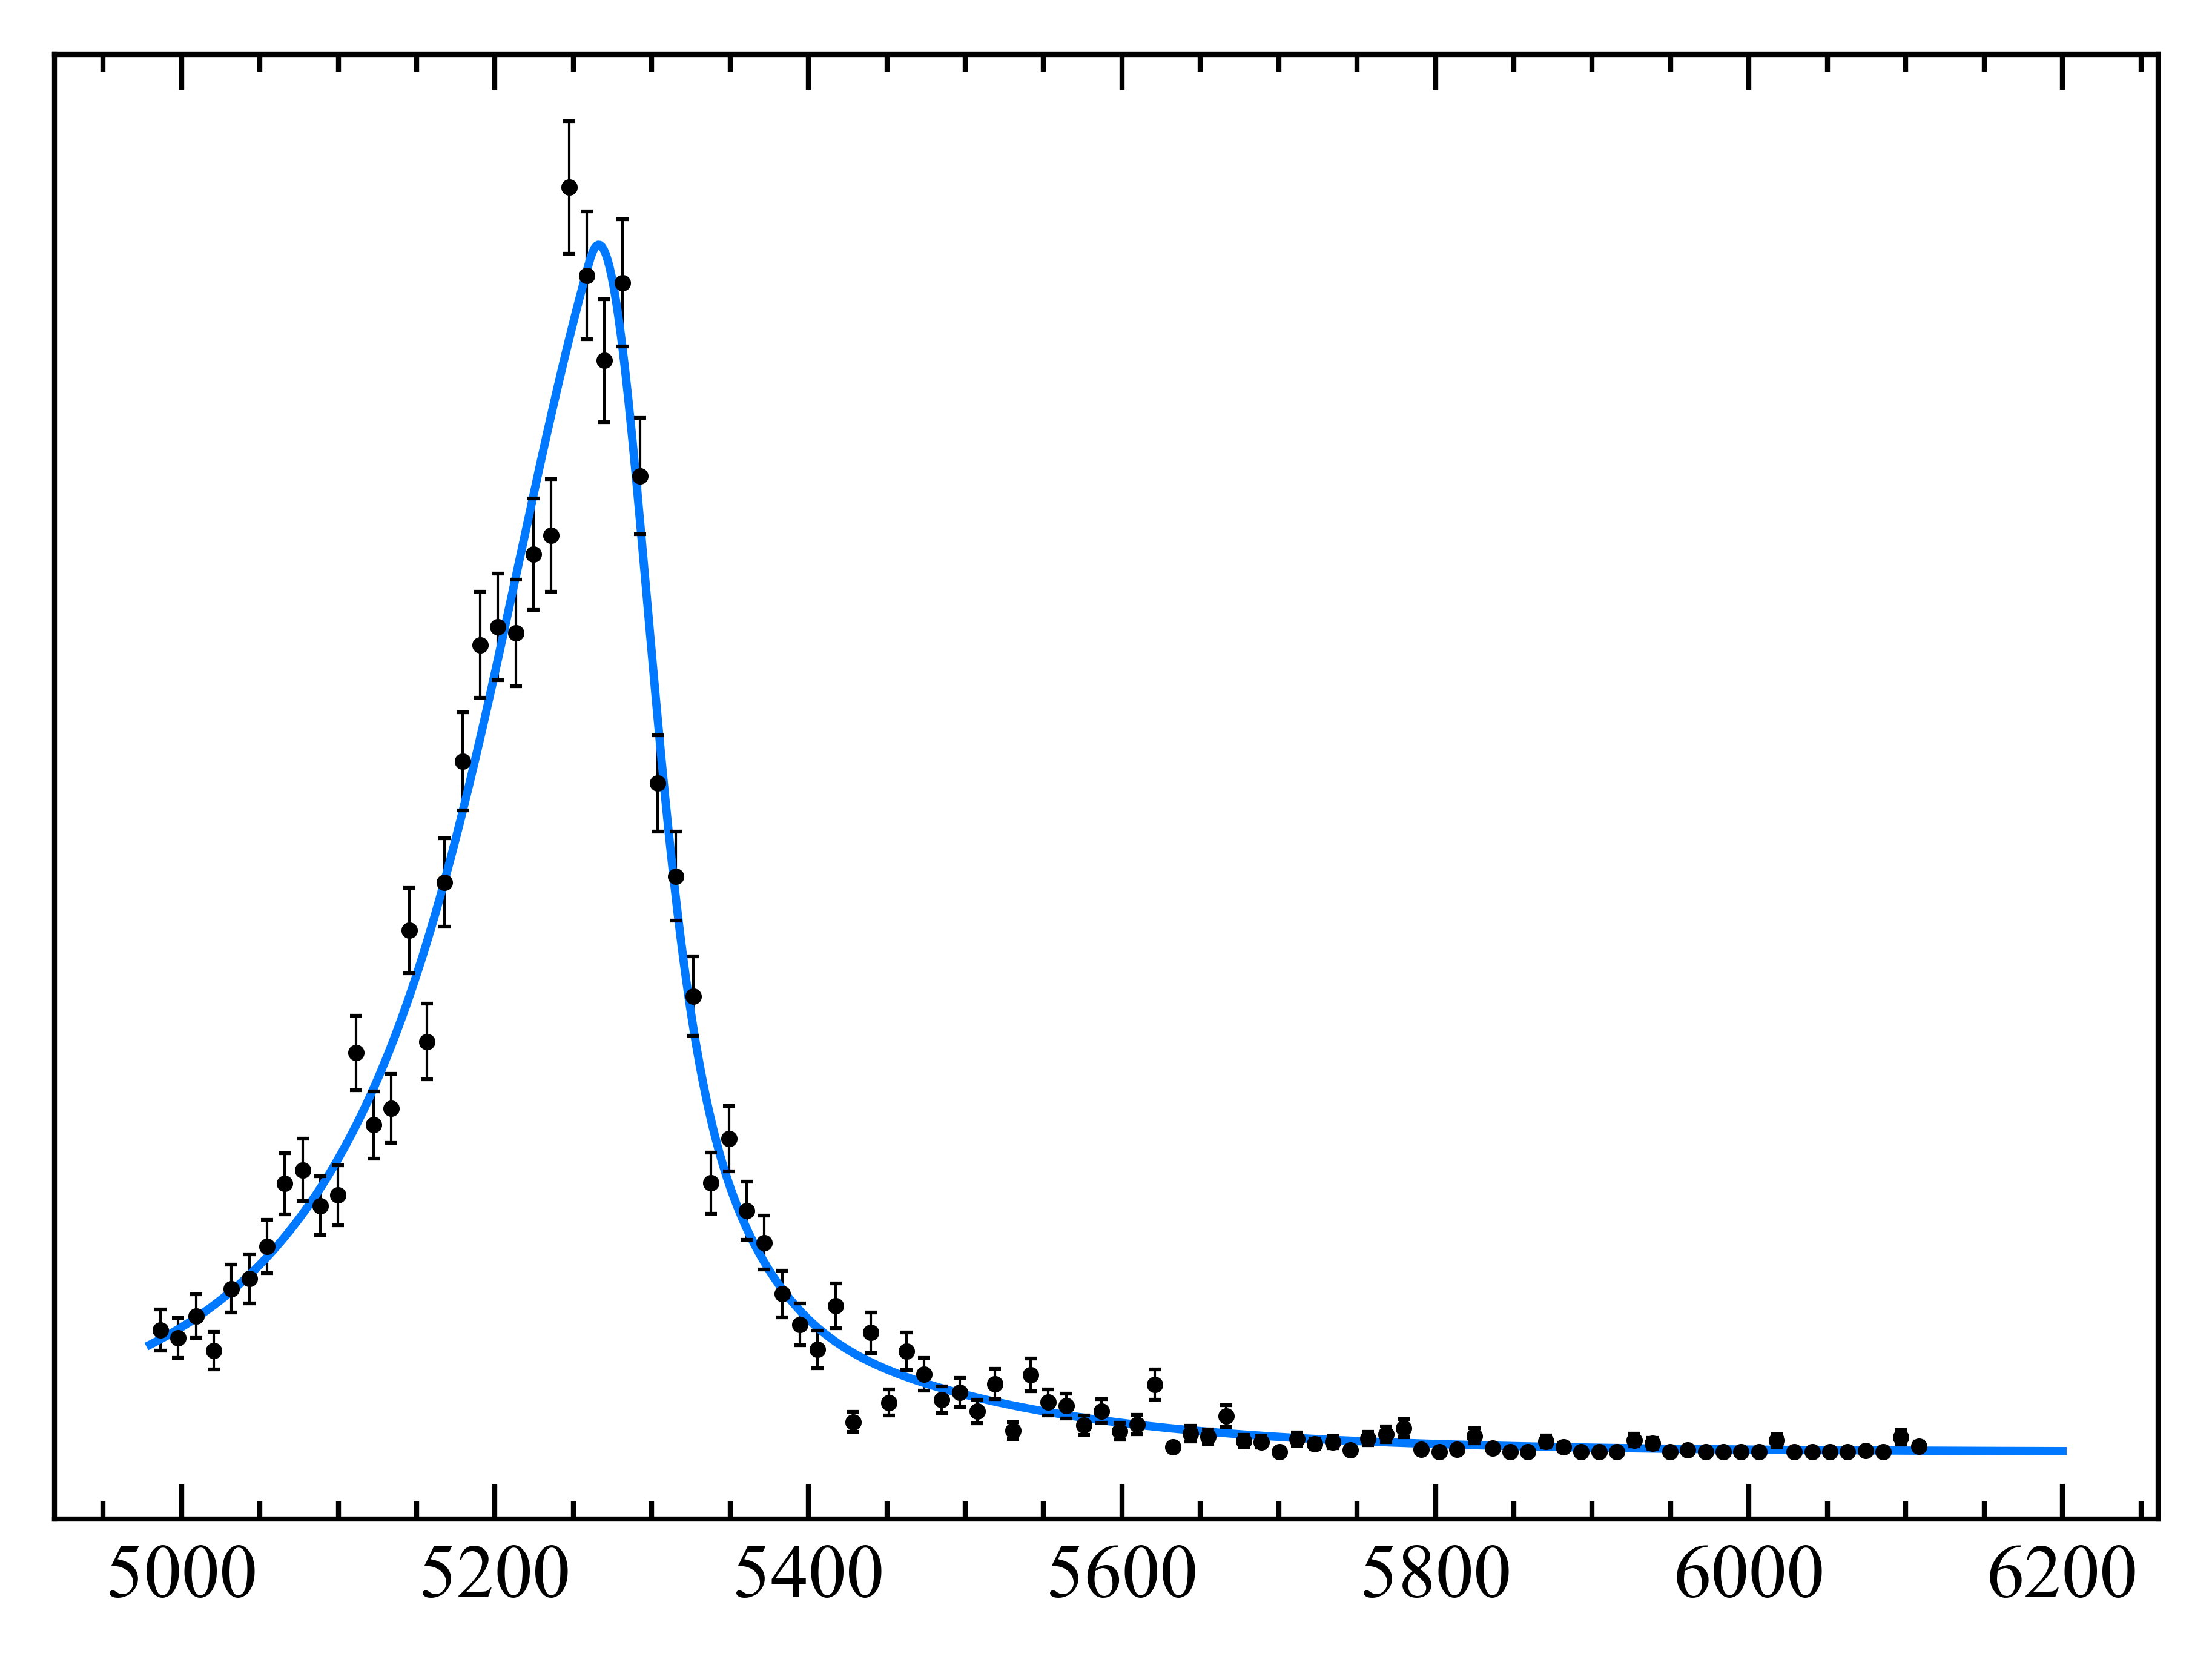

In [15]:
plot_model(sigModel1,B_plus_M1)

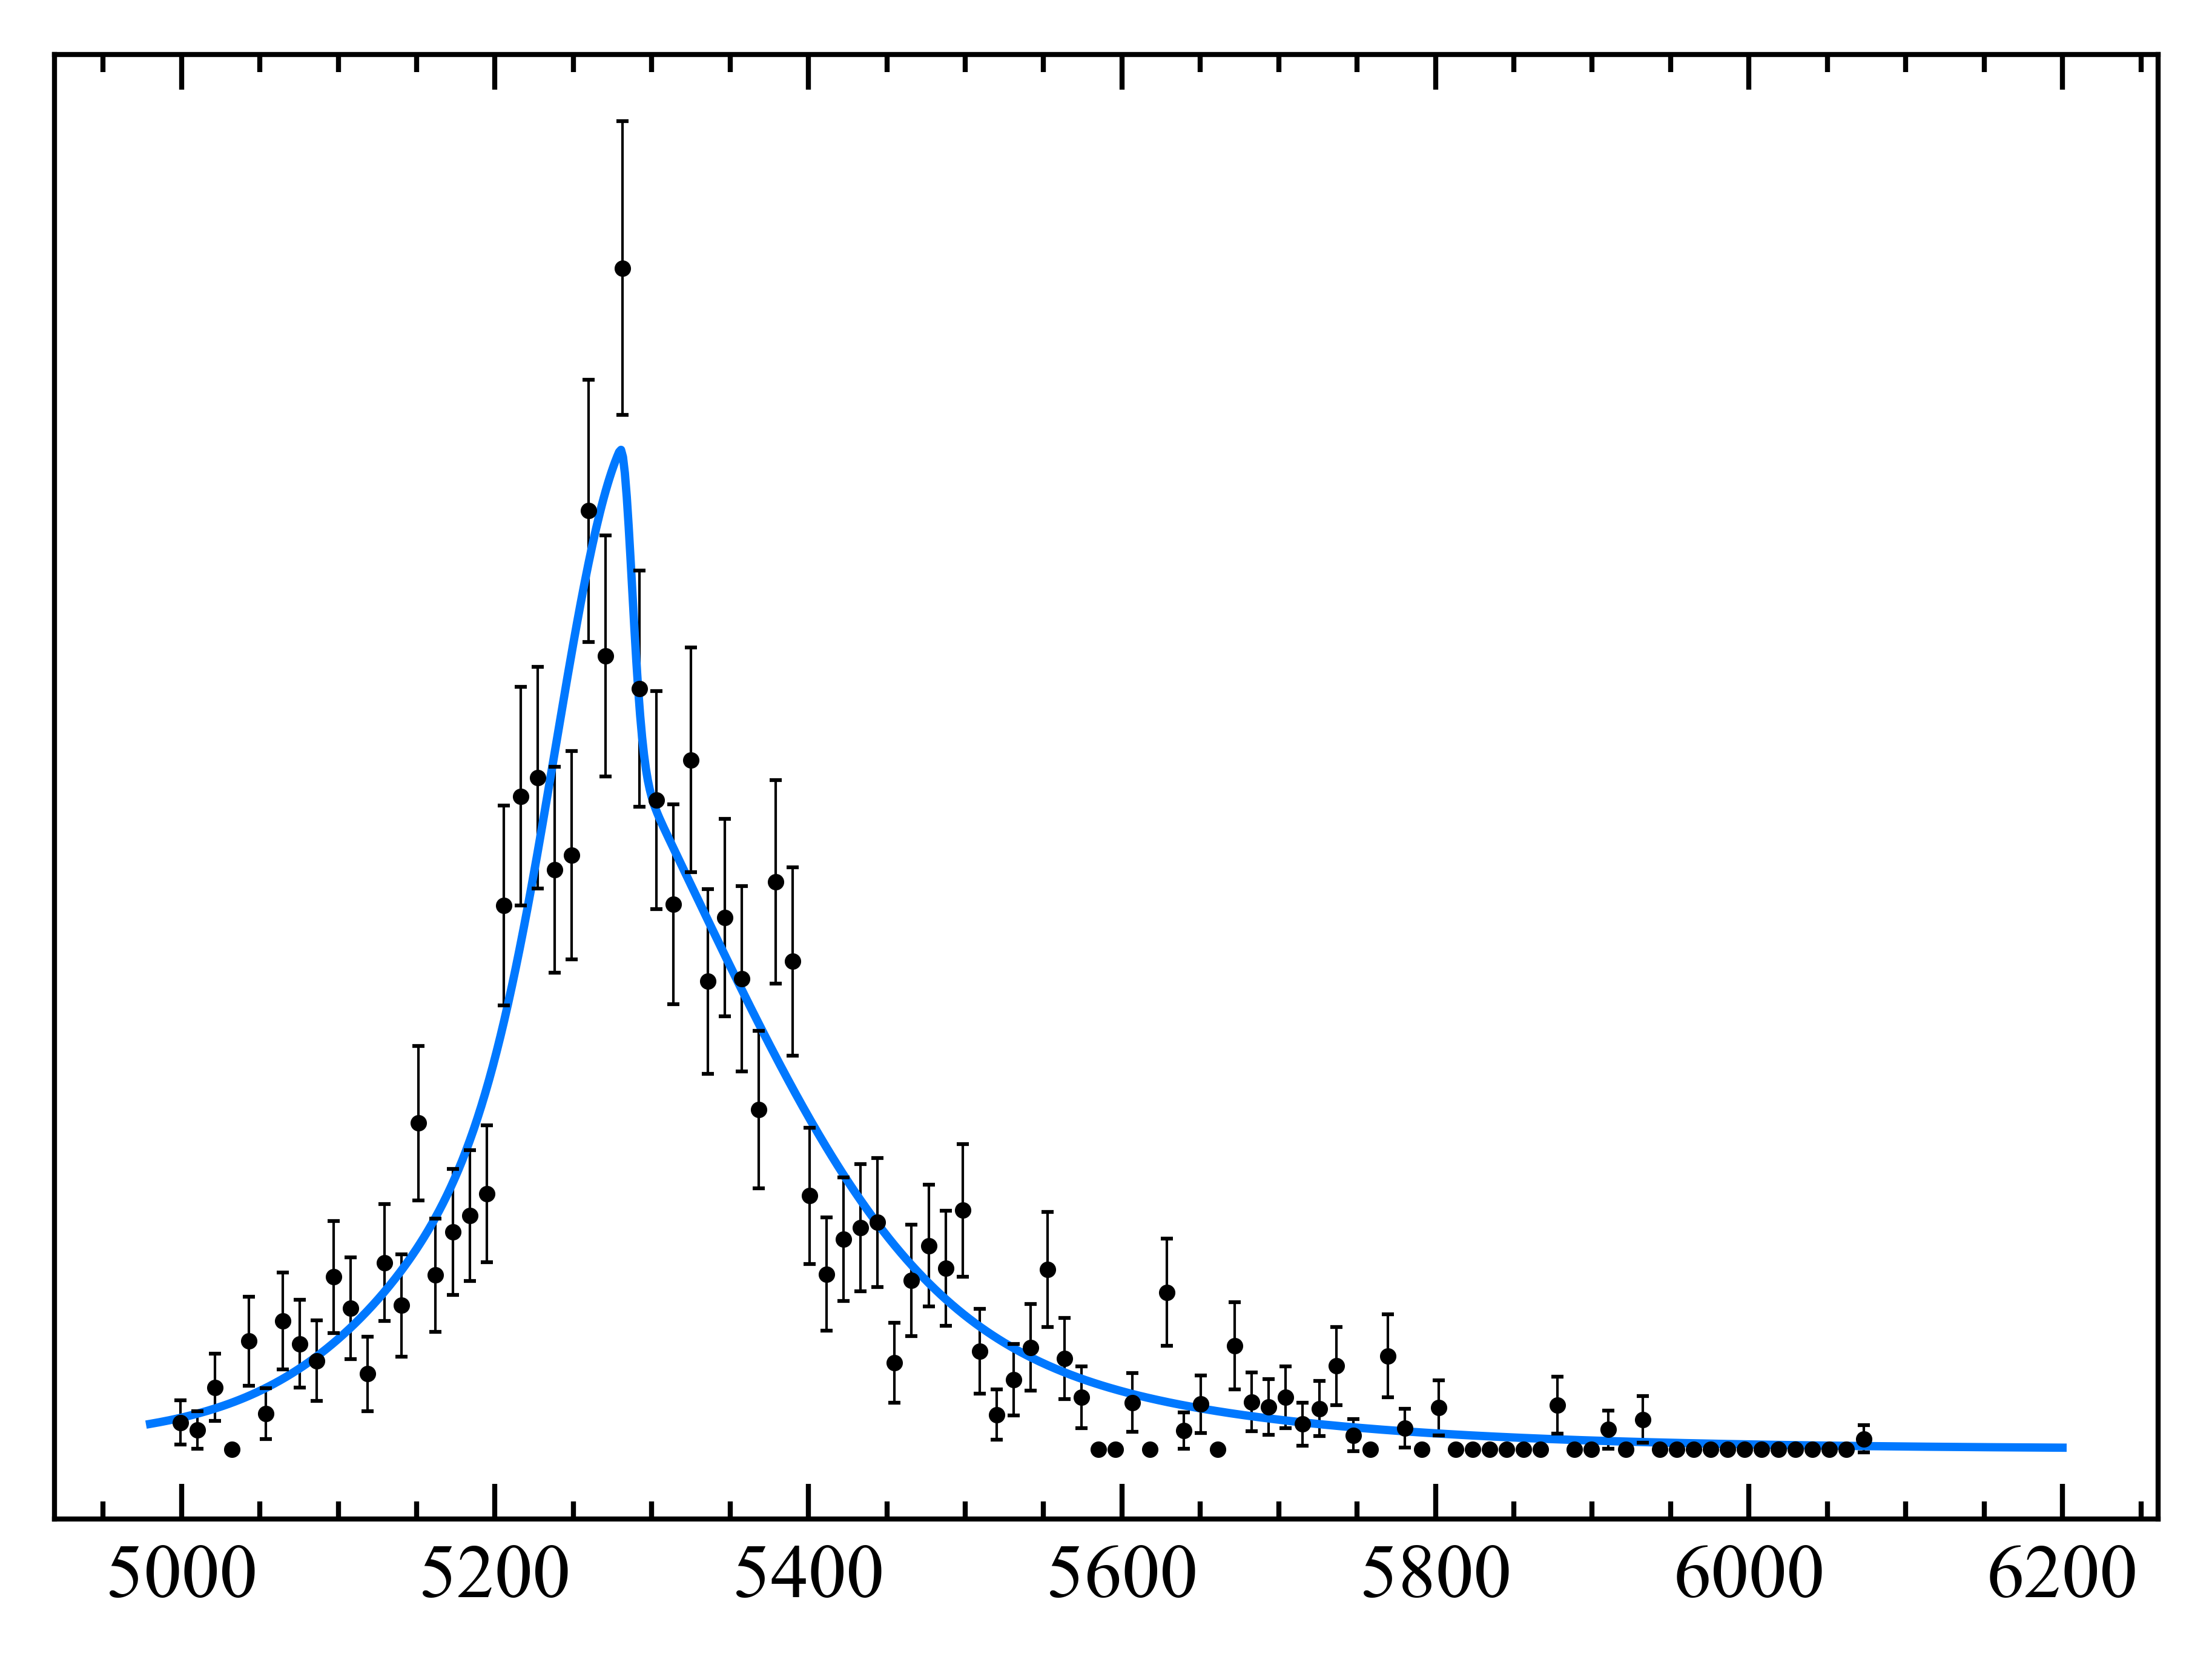

In [16]:
plot_model(sigModel2,B_plus_M2)

In [17]:
frac0gamma = zfit.Parameter("frac0gamma", f0g, floating=False)
frac1gamma = zfit.Parameter("frac1gamma", f1g, floating=False)
B_plus_M = zfit.Data.from_numpy(obs=obs, weights=KeeMC_trig0['PIDWeight_DLL4']*KeeMC_trig0['KinWeight_MUTOS2DNTracks'], array=KeeMC_trig0['B_plus_M'].to_numpy())

sigModelTot = zfit.pdf.SumPDF([sigModel0, sigModel1, sigModel2], [frac0gamma, frac1gamma])


plot_comp_model(sigModelTot, B_plus_M, save_plot=True, fileName="comp.png")

<Figure size 3600x2700 with 0 Axes>

In [18]:
tupleMCPsi2SName='KPsi2S_'+str(year)+'_truthed_bdt_reduced.root'
fileMCPsi2S = ur.open(PATH_MC+tupleMCPsi2SName)
treeMCPsi2S=fileMCPsi2S['DecayTree']

Psi2SKeeMC=treeMCPsi2S.arrays(library='pd', filter_name=branches)
Psi2SKeeMC*=1.

Psi2SKeeMC_CommonPresel = Psi2SKeeMC.query(preselStringNoPid)
Psi2SKeeMC_HltTOS = Psi2SKeeMC_CommonPresel.query(HltTOSString)
Psi2SKeeMC_trig0 = Psi2SKeeMC_HltTOS.query(q2Cut+" and "+trigCut+" and "+massRangeCut+" and "+BDTCut)

[ErrorBarArtists(errorbar=<ErrorbarContainer object of 3 artists>)]

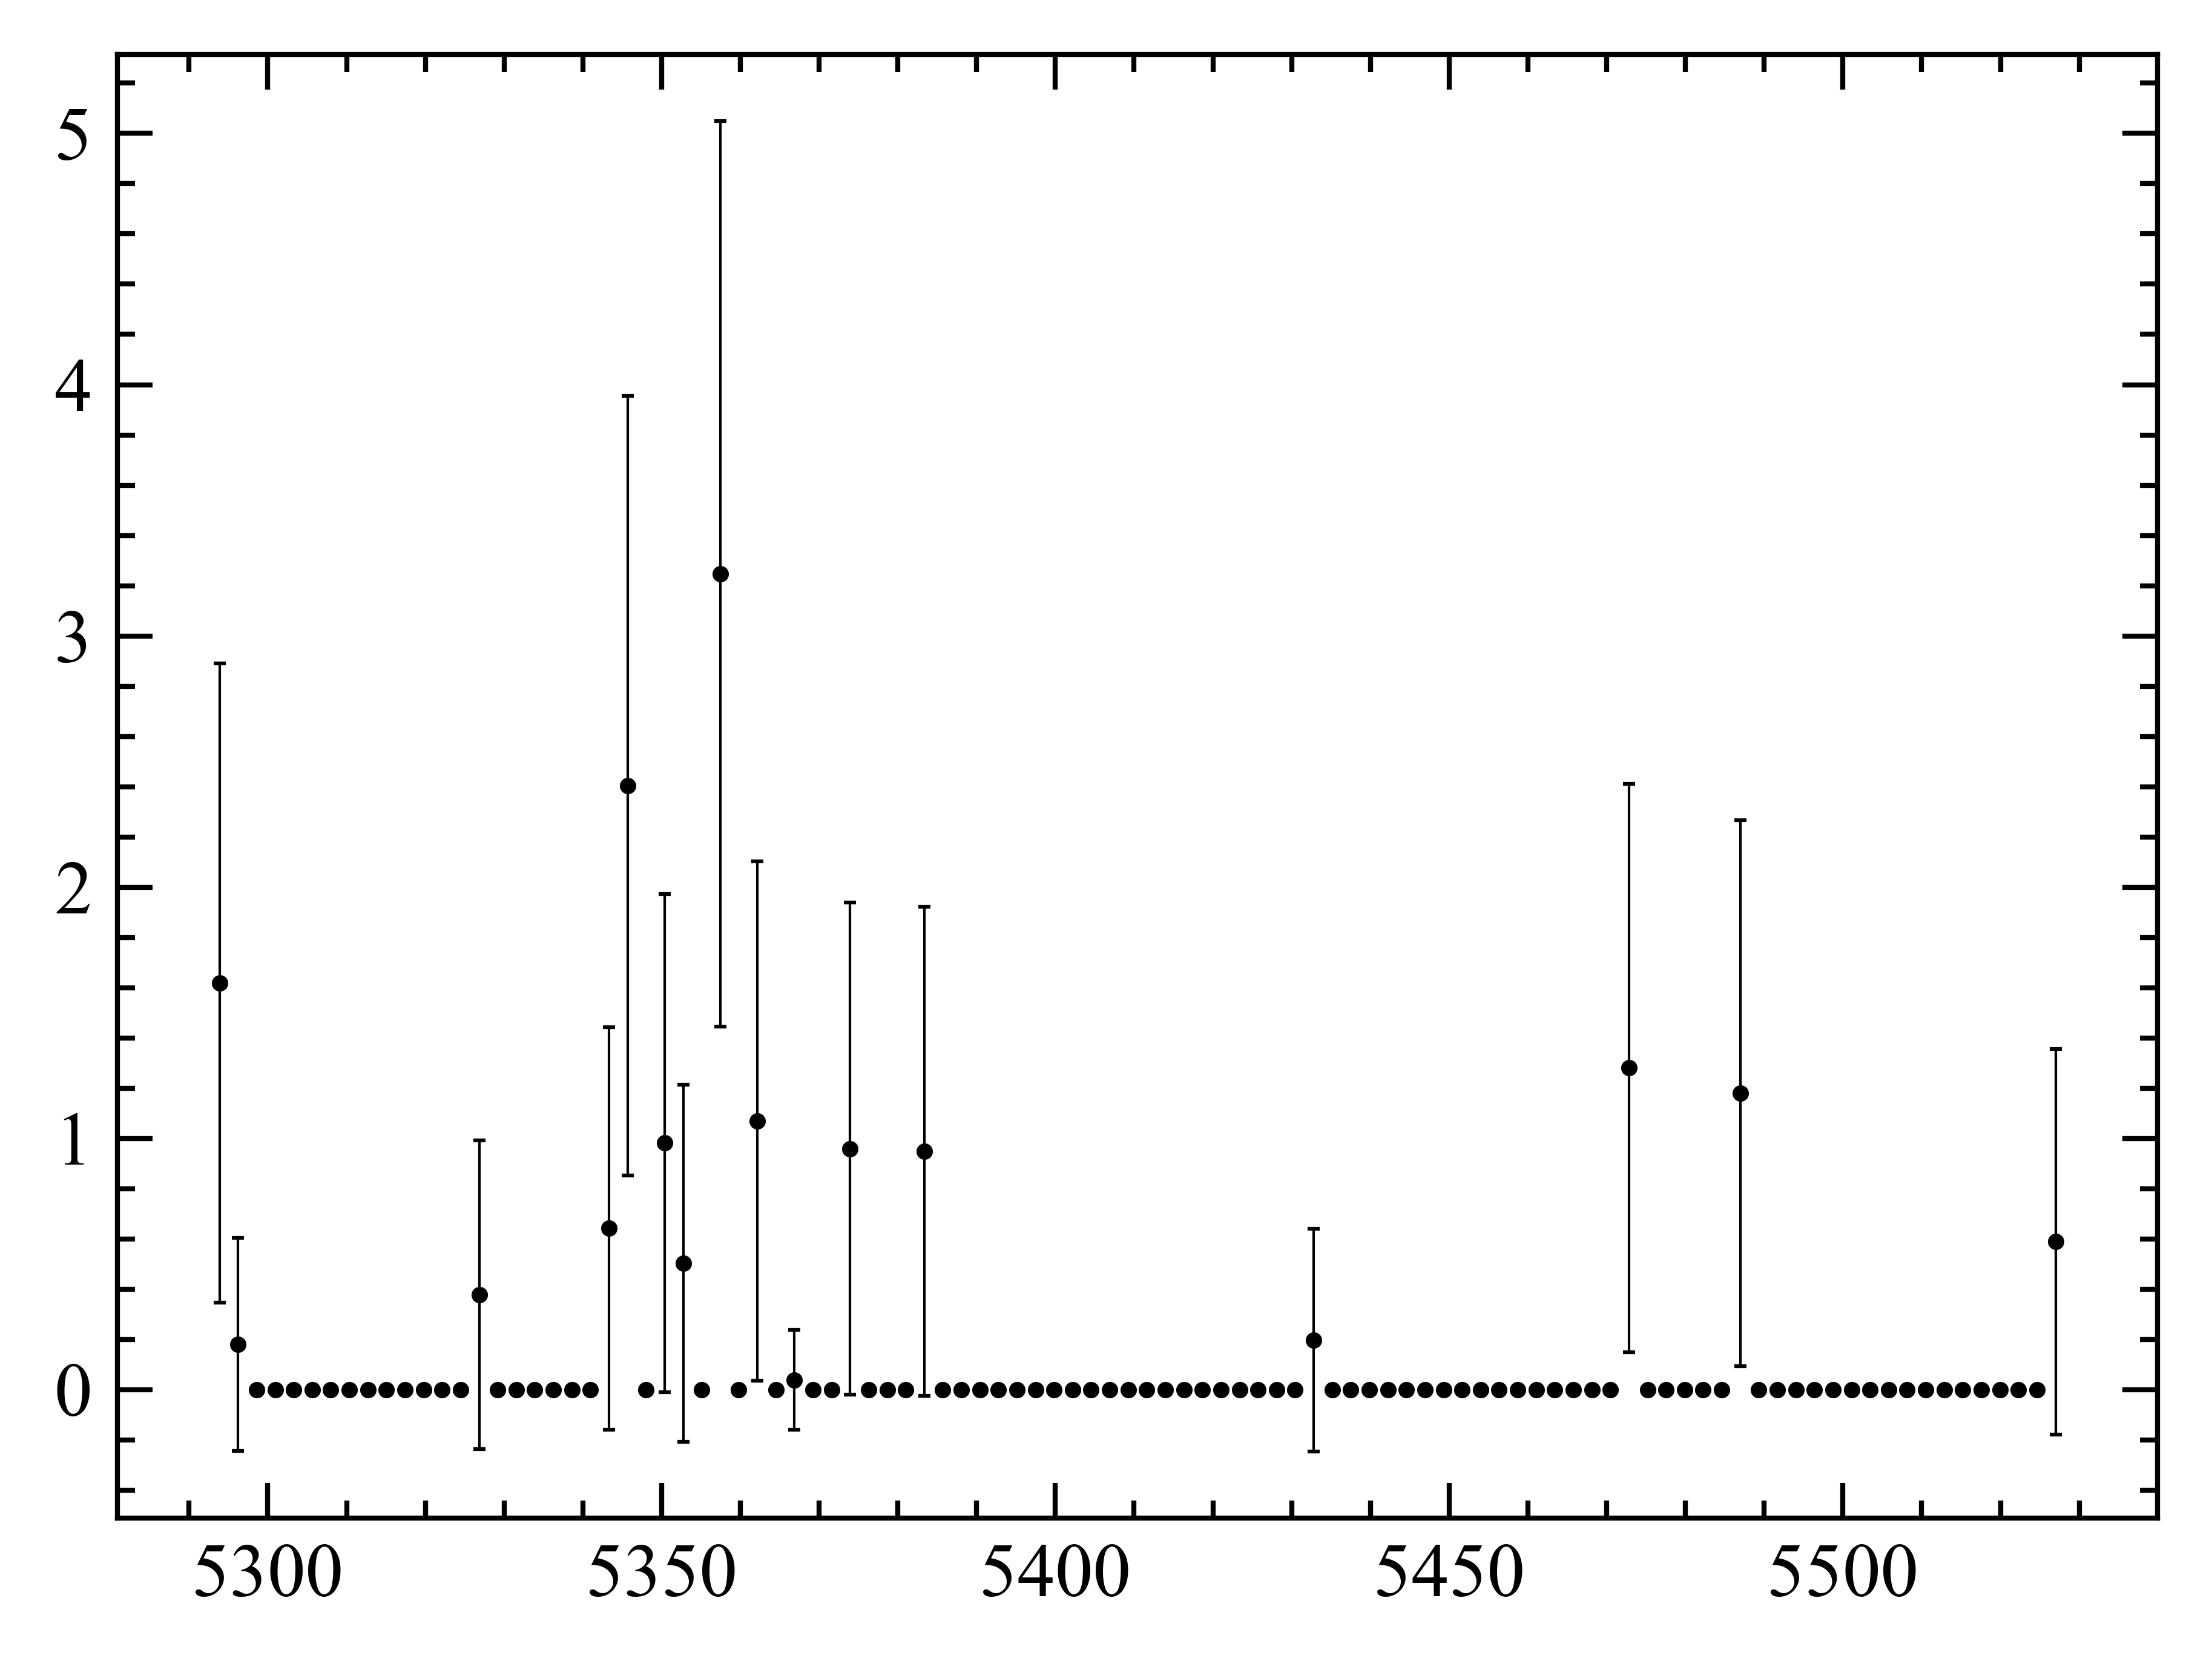

In [19]:

mplhep.histplot(plt.hist(Psi2SKeeMC_trig0['B_plus_M'], weights=Psi2SKeeMC_trig0['PIDWeight_DLL4']*Psi2SKeeMC_trig0['KinWeight_MUTOS2DNTracks'], bins=100, facecolor="none"), 
                yerr=True, color='black', histtype='errorbar')

In [20]:
tupleMCKstName='Kstee_'+str(year)+'_truthed_bdt_reduced.root'
fileMCKst = ur.open(PATH_MC+tupleMCKstName)
treeMCKst=fileMCKst['DecayTree']

KstMC=treeMCKst.arrays(library='pd', filter_name=branches)
KstMC*=1.

KstMC_CommonPresel = KstMC.query(preselStringNoPid)
KstMC_HltTOS = KstMC_CommonPresel.query(HltTOSString)

KstMC_trig0 = KstMC_HltTOS.query(q2Cut+" and "+trigCut+" and "+massRangeCutExt+" and "+BDTCut)

[ErrorBarArtists(errorbar=<ErrorbarContainer object of 3 artists>)]

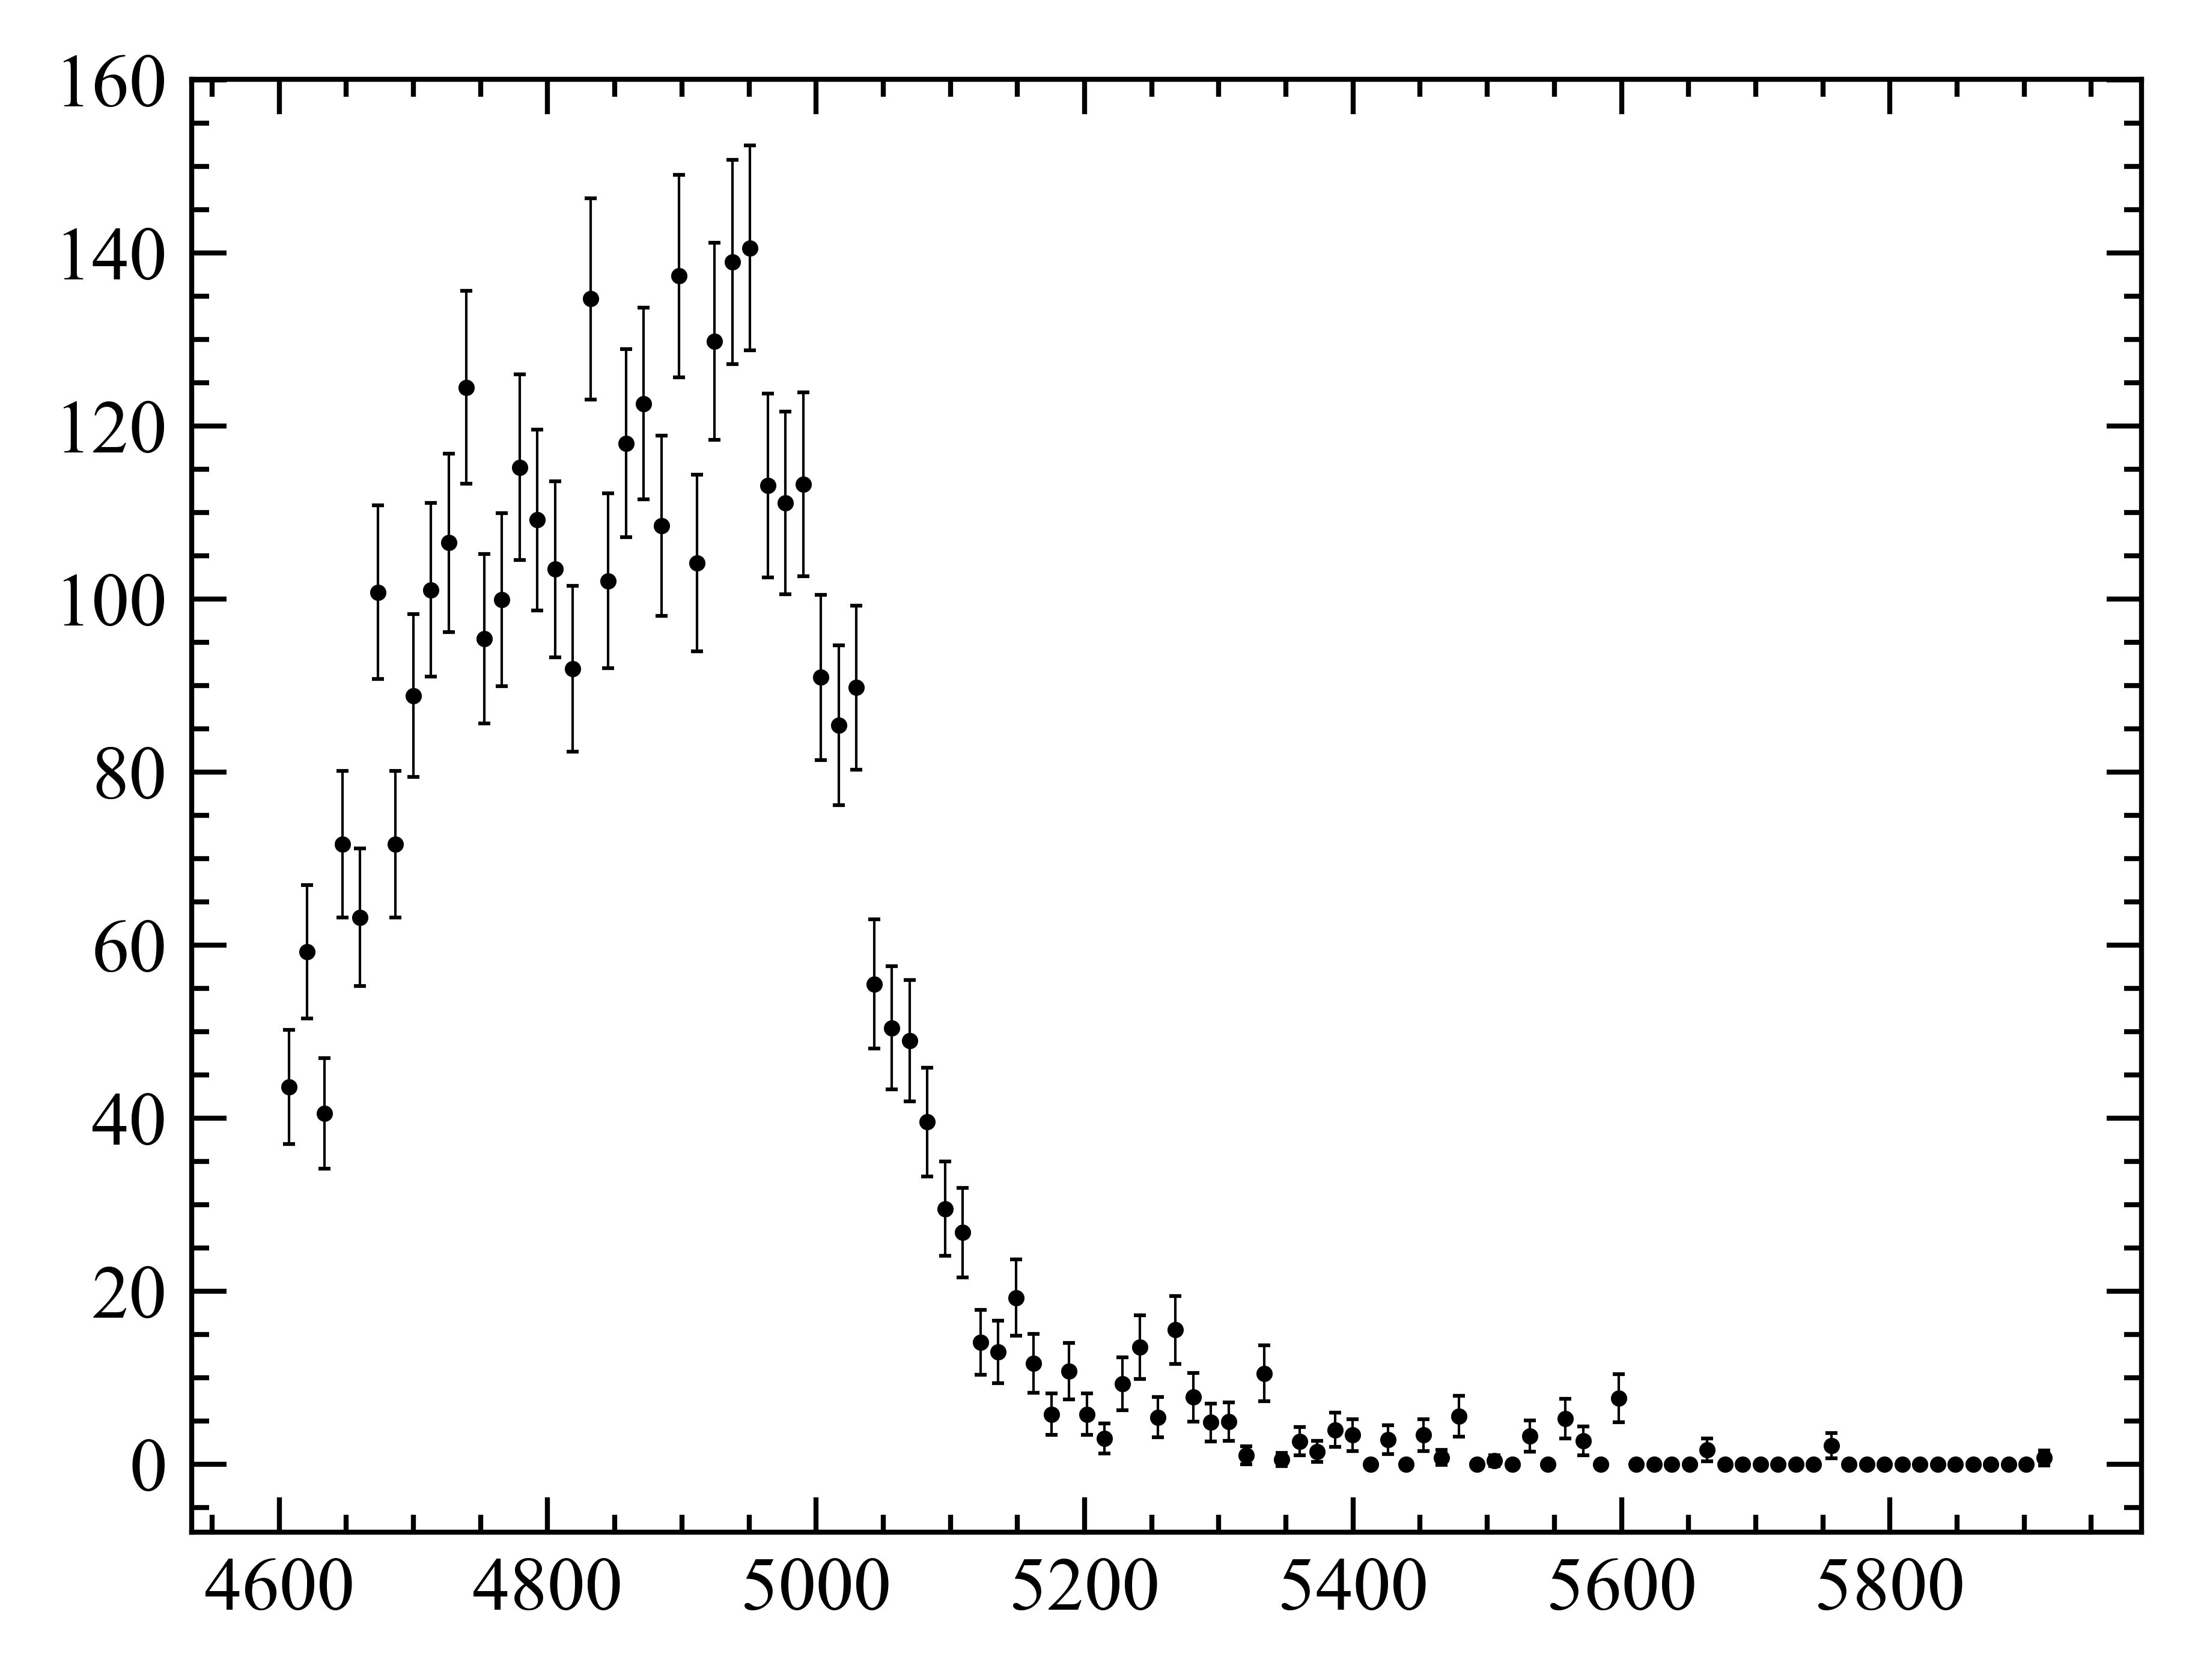

In [21]:
mplhep.histplot(plt.hist(KstMC_trig0['B_plus_M'], weights=KstMC_trig0['PIDWeight_DLL4']*KstMC_trig0['KinWeight_MUTOS2DNTracks'], bins=100, facecolor="none"), 
                yerr=True, color='black', histtype='errorbar')



In [22]:
obs_extended = zfit.Space('B_plus_M', (4600, 6200))

B_plus_M_partreco = zfit.Data.from_numpy(obs=obs_extended, weights=KstMC_trig0['PIDWeight_DLL4']*KstMC_trig0['KinWeight_MUTOS2DNTracks'], array=KstMC_trig0['B_plus_M'].to_numpy())
part_reco = zfit.pdf.GaussianKDE1DimV1(obs=obs, data=B_plus_M_partreco, bandwidth='adaptive')




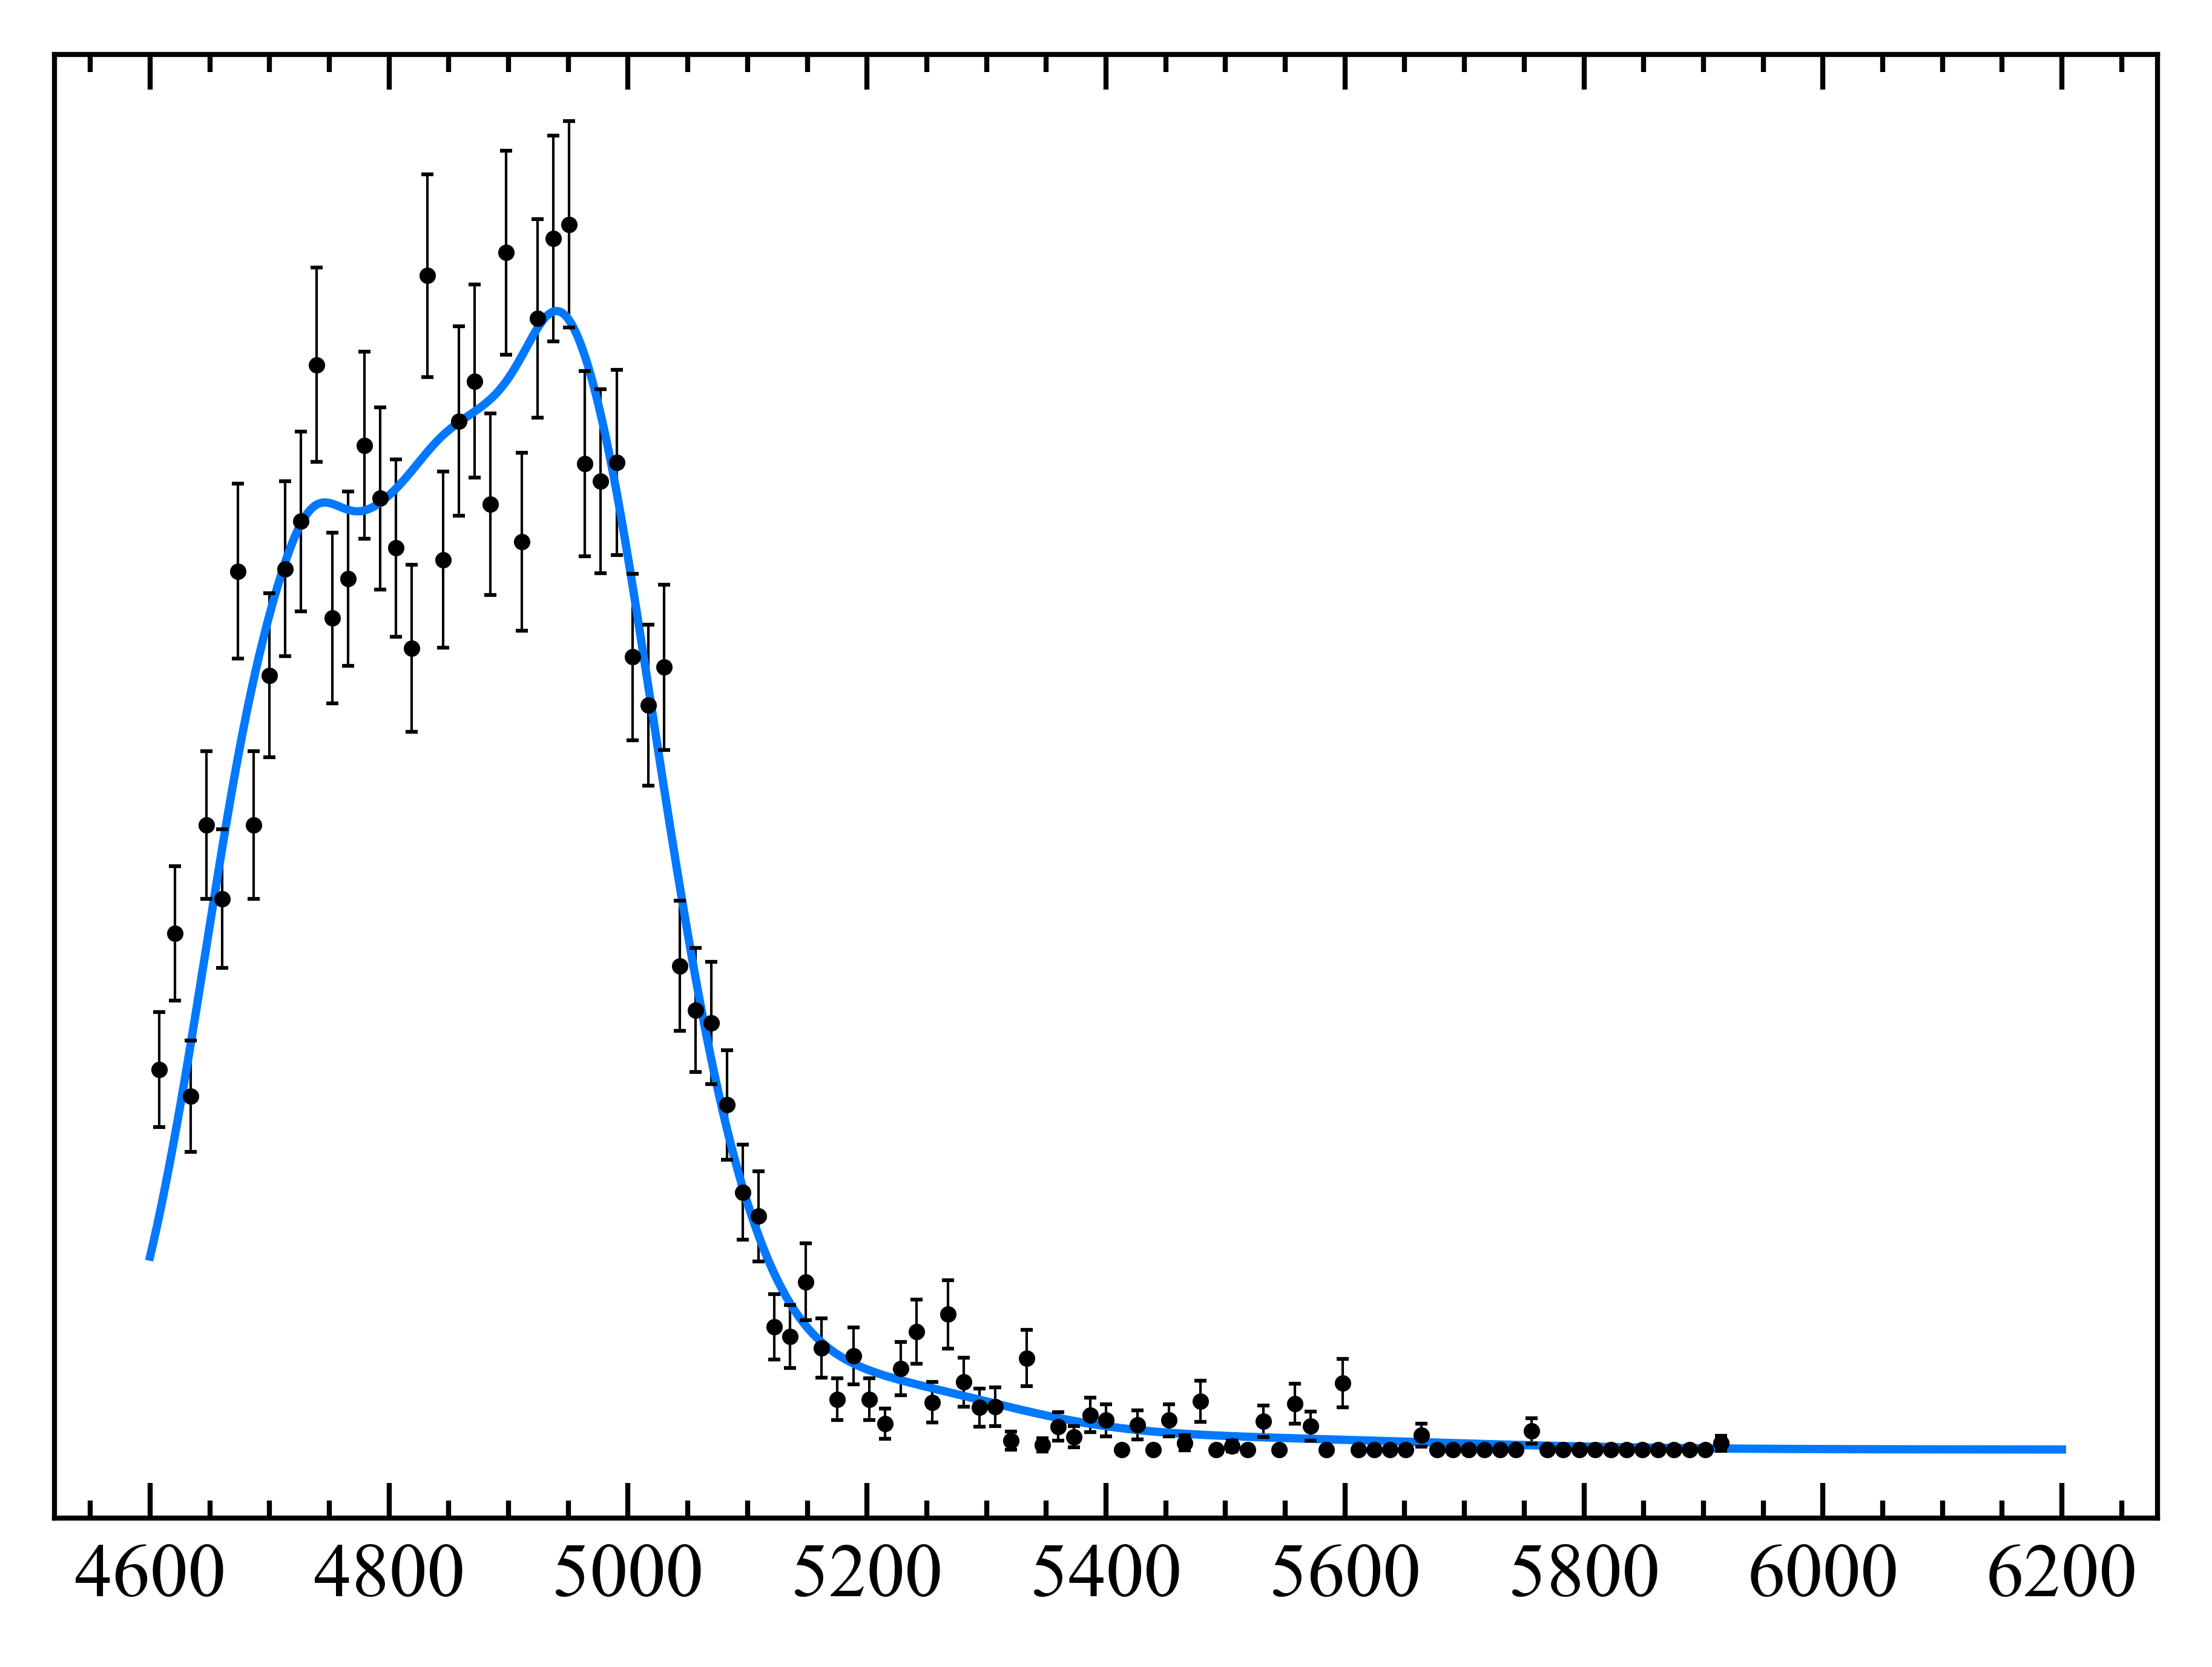

In [23]:
plot_model(part_reco, B_plus_M_partreco)

In [24]:
tupleDataName='B2Kee_'+str(year)+'_CommonPresel_HltTOS_bdt_reduced.root'
fileData = ur.open(PATH_Data+tupleDataName)
treeData=fileData['DecayTree']


In [25]:
Data=treeData.arrays(library='pd', filter_name=branches)
Data*=1.
Data_CommonPresel=Data.query(preselString)
Data_trig0 = Data_CommonPresel.query(q2Cut+" and "+trigCut+" and "+blindRangeCut+" and "+BDTCut)




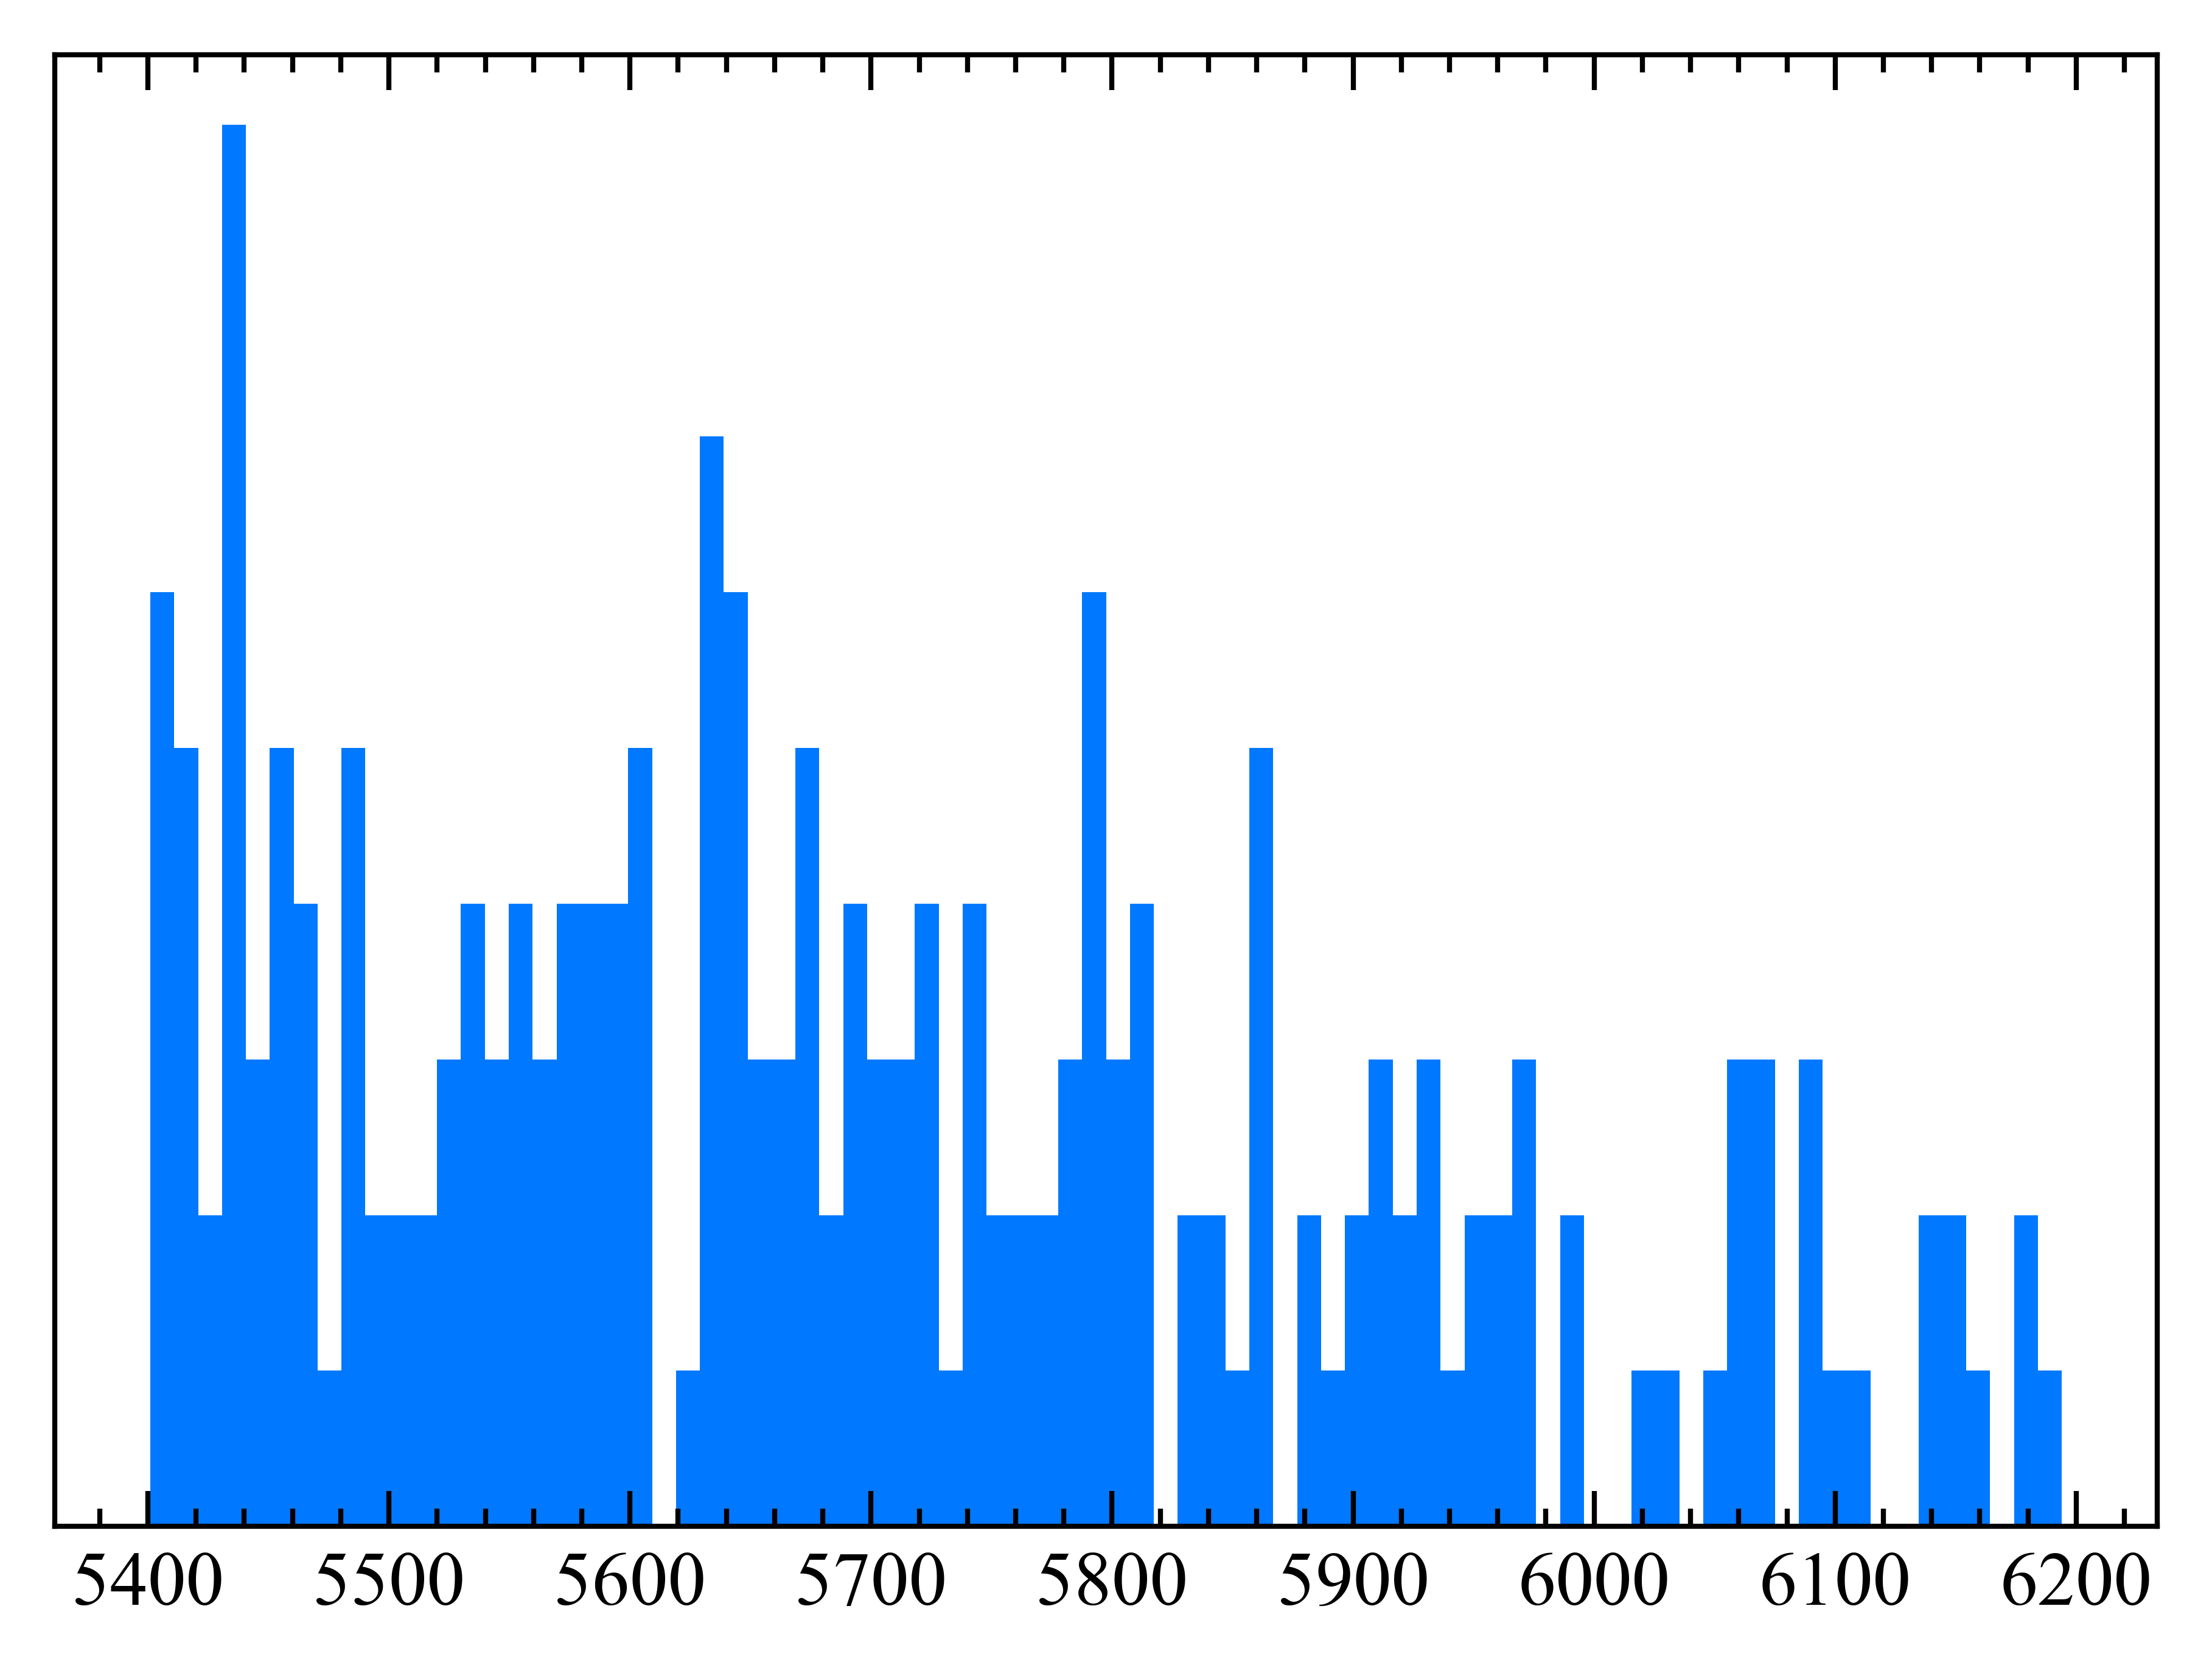

In [26]:
plt.hist(Data_trig0['B_plus_M'],bins=80)[0];
frame = pylab.gca()
frame.axes.get_yaxis().set_ticks([])
pylab.show()

In [27]:

obs_right_sideband = zfit.Space('B_plus_M', (5400, 6200))
B_plus_M_data = zfit.Data.from_numpy(obs=obs, array=Data_trig0['B_plus_M'].to_numpy())




In [28]:
lam = zfit.Parameter('lambda', -1e-3, -0.1, 0.001)
comb_bkg = zfit.pdf.Exponential(lam, obs=obs)



In [29]:
comb_bkg_yield = zfit.Parameter('comb_bkg_yield', 2000, 0, 10000, step_size=0.1)
comb_bkg_ext = comb_bkg.create_extended(comb_bkg_yield)

In [30]:
with comb_bkg_ext.set_norm_range(obs_right_sideband):
    nll_sidebands = zfit.loss.ExtendedUnbinnedNLL(comb_bkg_ext, B_plus_M_data)
    minimizer.minimize(nll_sidebands)

/disk/lhcb_data/davide/miniconda3/envs/zfit_env/lib/python3.8/site-packages/zfit/core/loss.py:154: AdvancedFeatureWarning: Either you're using an advanced feature OR causing unwanted behavior. To turn this warning off, use `zfit.settings.advanced_warnings['inconsistent_fitrange']` = False`  or 'all' (use with care) with `zfit.settings.advanced_warnings['all'] = False
PDFs [<zfit.Exponential  params=[lambda] dtype=float64>0] as well as `data` [<zfit.core.data.Data object at 0x7fbe900666d0>] have different ranges [(<zfit Space obs=('B_plus_M',), axes=(0,), limits=(array([[5400.]]), array([[6200.]]))>, <zfit Space obs=('B_plus_M',), axes=(0,), limits=(array([[4980.]]), array([[6200.]]))>)] they are defined in. The data range will cut the data while the norm range defines the normalization.
  warn_advanced_feature(f"PDFs {non_consistent['model']} as "
/disk/lhcb_data/davide/miniconda3/envs/zfit_env/lib/python3.8/site-packages/zfit/util/cache.py:283: VisibleDeprecationWarning: Creating an n

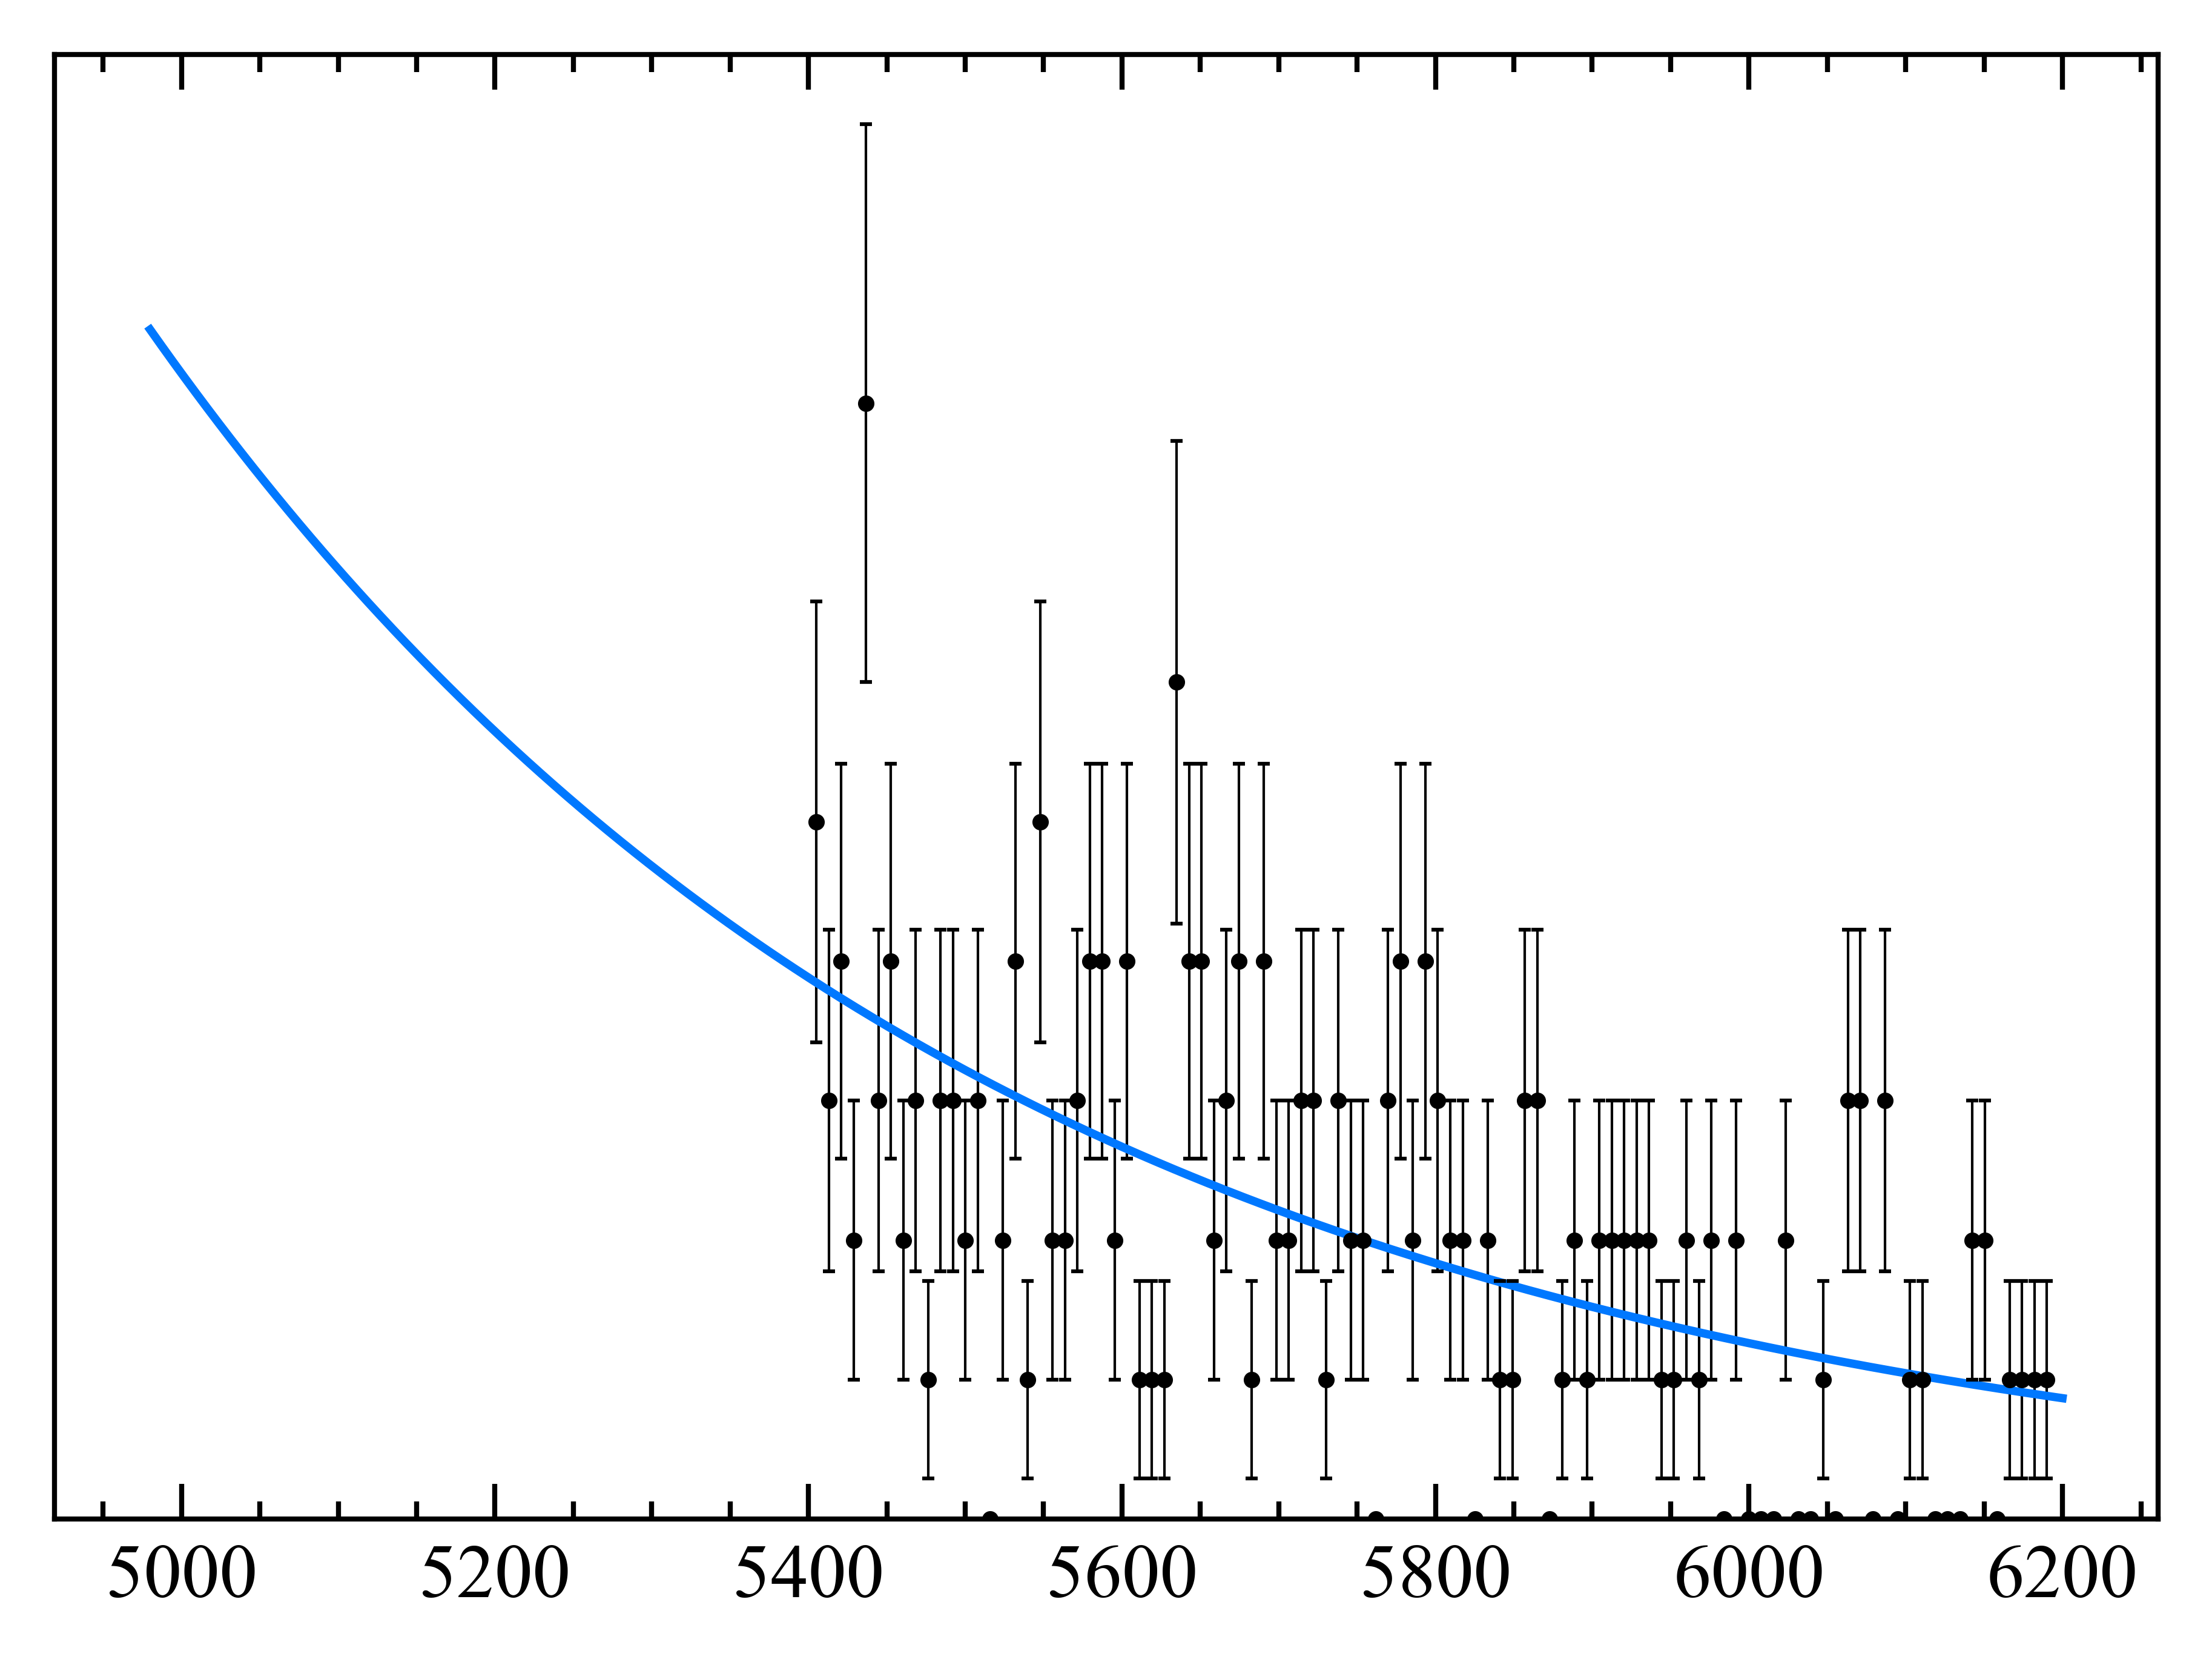

In [31]:
plot_model_combi(comb_bkg_ext,B_plus_M_data)

In [32]:
est_comb=(comb_bkg_yield/comb_bkg_ext.integrate(limits=(5400,6200))).numpy()[0]

In [33]:
lam.value

<bound method Parameter.value of <zfit.Parameter 'lambda' floating=True value=-0.001873>>

In [34]:
def getEff(dataFrame, cut):
    
    bdt_cut = "BDT_score_selection>"+str(cut)
    totTruthed=dataFrame['KinWeight_MUTOS2DNTracks'].sum()
    
    data_q2Presel = dataFrame.query(preselStringNoPid+" and "+q2Cut+" and "+massRangeCut+" and "+bdt_cut)
    
    totPresel=(data_q2Presel['PIDWeight_DLL4']*data_q2Presel['KinWeight_MUTOS2DNTracks']).sum()
    
    data_t0=data_q2Presel.query('passTrigCat0==1.')
    
    totTrig0=(data_t0['PIDWeight_DLL4']*data_t0['KinWeight_MUTOS2DNTracks']).sum()
    
    effTrig=totTrig0/totPresel
    effPresel=totPresel/totTruthed
    effTot=effTrig*effPresel
    
    return effTot, effTrig, effPresel


In [35]:
BFKstee=1.166e-6
BFKee=5.657e-7
BFPsi2SKee = 7.89e-3*6.21e-4
effStrip=0.13846

In [36]:
NKee_bf_Run1 = (72e-6*3e15*0.4*BFKee)
NKee_bf_Run2 = (144e-6*9e15*0.4*BFKee)
NKee_bf=NKee_bf_Run1+NKee_bf_Run2

In [88]:
effTotKeeWith, _, _ =getEff(KeeMC, 0.83)

In [89]:
effTotKeeWithout, _, _ =getEff(KeeMC, 0.00)

In [90]:
effTotKeeWith/effTotKeeWithout

0.9200200961738773

In [37]:
effTotKee, _, _ =getEff(KeeMC, cut)
effTotKstee, _, _ =getEff(KstMC, cut)
effTotPsi2SKee, _, _ = getEff(Psi2SKeeMC, cut)

In [38]:
NKee=(NKee_bf_Run1*effStrip*0.66*effTotKee)+(NKee_bf_Run2*effStrip*effTotKee)
NKstee=NKee*(BFKstee*effTotKstee)/(BFKee*effTotKee);
Ncomb=comb_bkg_yield.numpy()

In [39]:
NPsi2SKee = NKee*((BFPsi2SKee*effTotPsi2SKee)/(BFKee*effTotKee));

In [40]:
NPsi2SKee

5.3927477575269425

In [41]:
Ntot = NKee+NKstee+Ncomb
fracKee=NKee/Ntot
fracKst=NKstee/Ntot

In [42]:
sig_frac = zfit.Parameter('sig_frac', fracKee, 0, 1)
prc_bkg_frac = zfit.Parameter('prc_bkg_frac', fracKst, 0, 1)

In [44]:
shift = np.random.normal(-4.841,0.46)
scale = np.random.normal(1.118,0.006)


val=mean0.value().numpy()
mean0.set_value(val+shift)
val=mean1.value().numpy()
mean1.set_value(val+shift)
val=mean2.value().numpy()
mean2.set_value(val+shift)

val=sigma1.value().numpy()
sigma1.set_value(val*scale)
val=sigma21.value().numpy()
sigma21.set_value(val*scale)
val=sigma31.value().numpy()
sigma31.set_value(val*scale)

val=sigma2.value().numpy()
sigma2.set_value(val*scale)
val=sigma22.value().numpy()
sigma22.set_value(val*scale)
val=sigma32.value().numpy()
sigma32.set_value(val*scale)

In [45]:
#with comb_bkg.set_norm_range([4980,6200]):
modelTot = zfit.pdf.SumPDF([sigModelTot, part_reco, comb_bkg], [sig_frac, prc_bkg_frac])
data = modelTot.sample(n=Ntot)

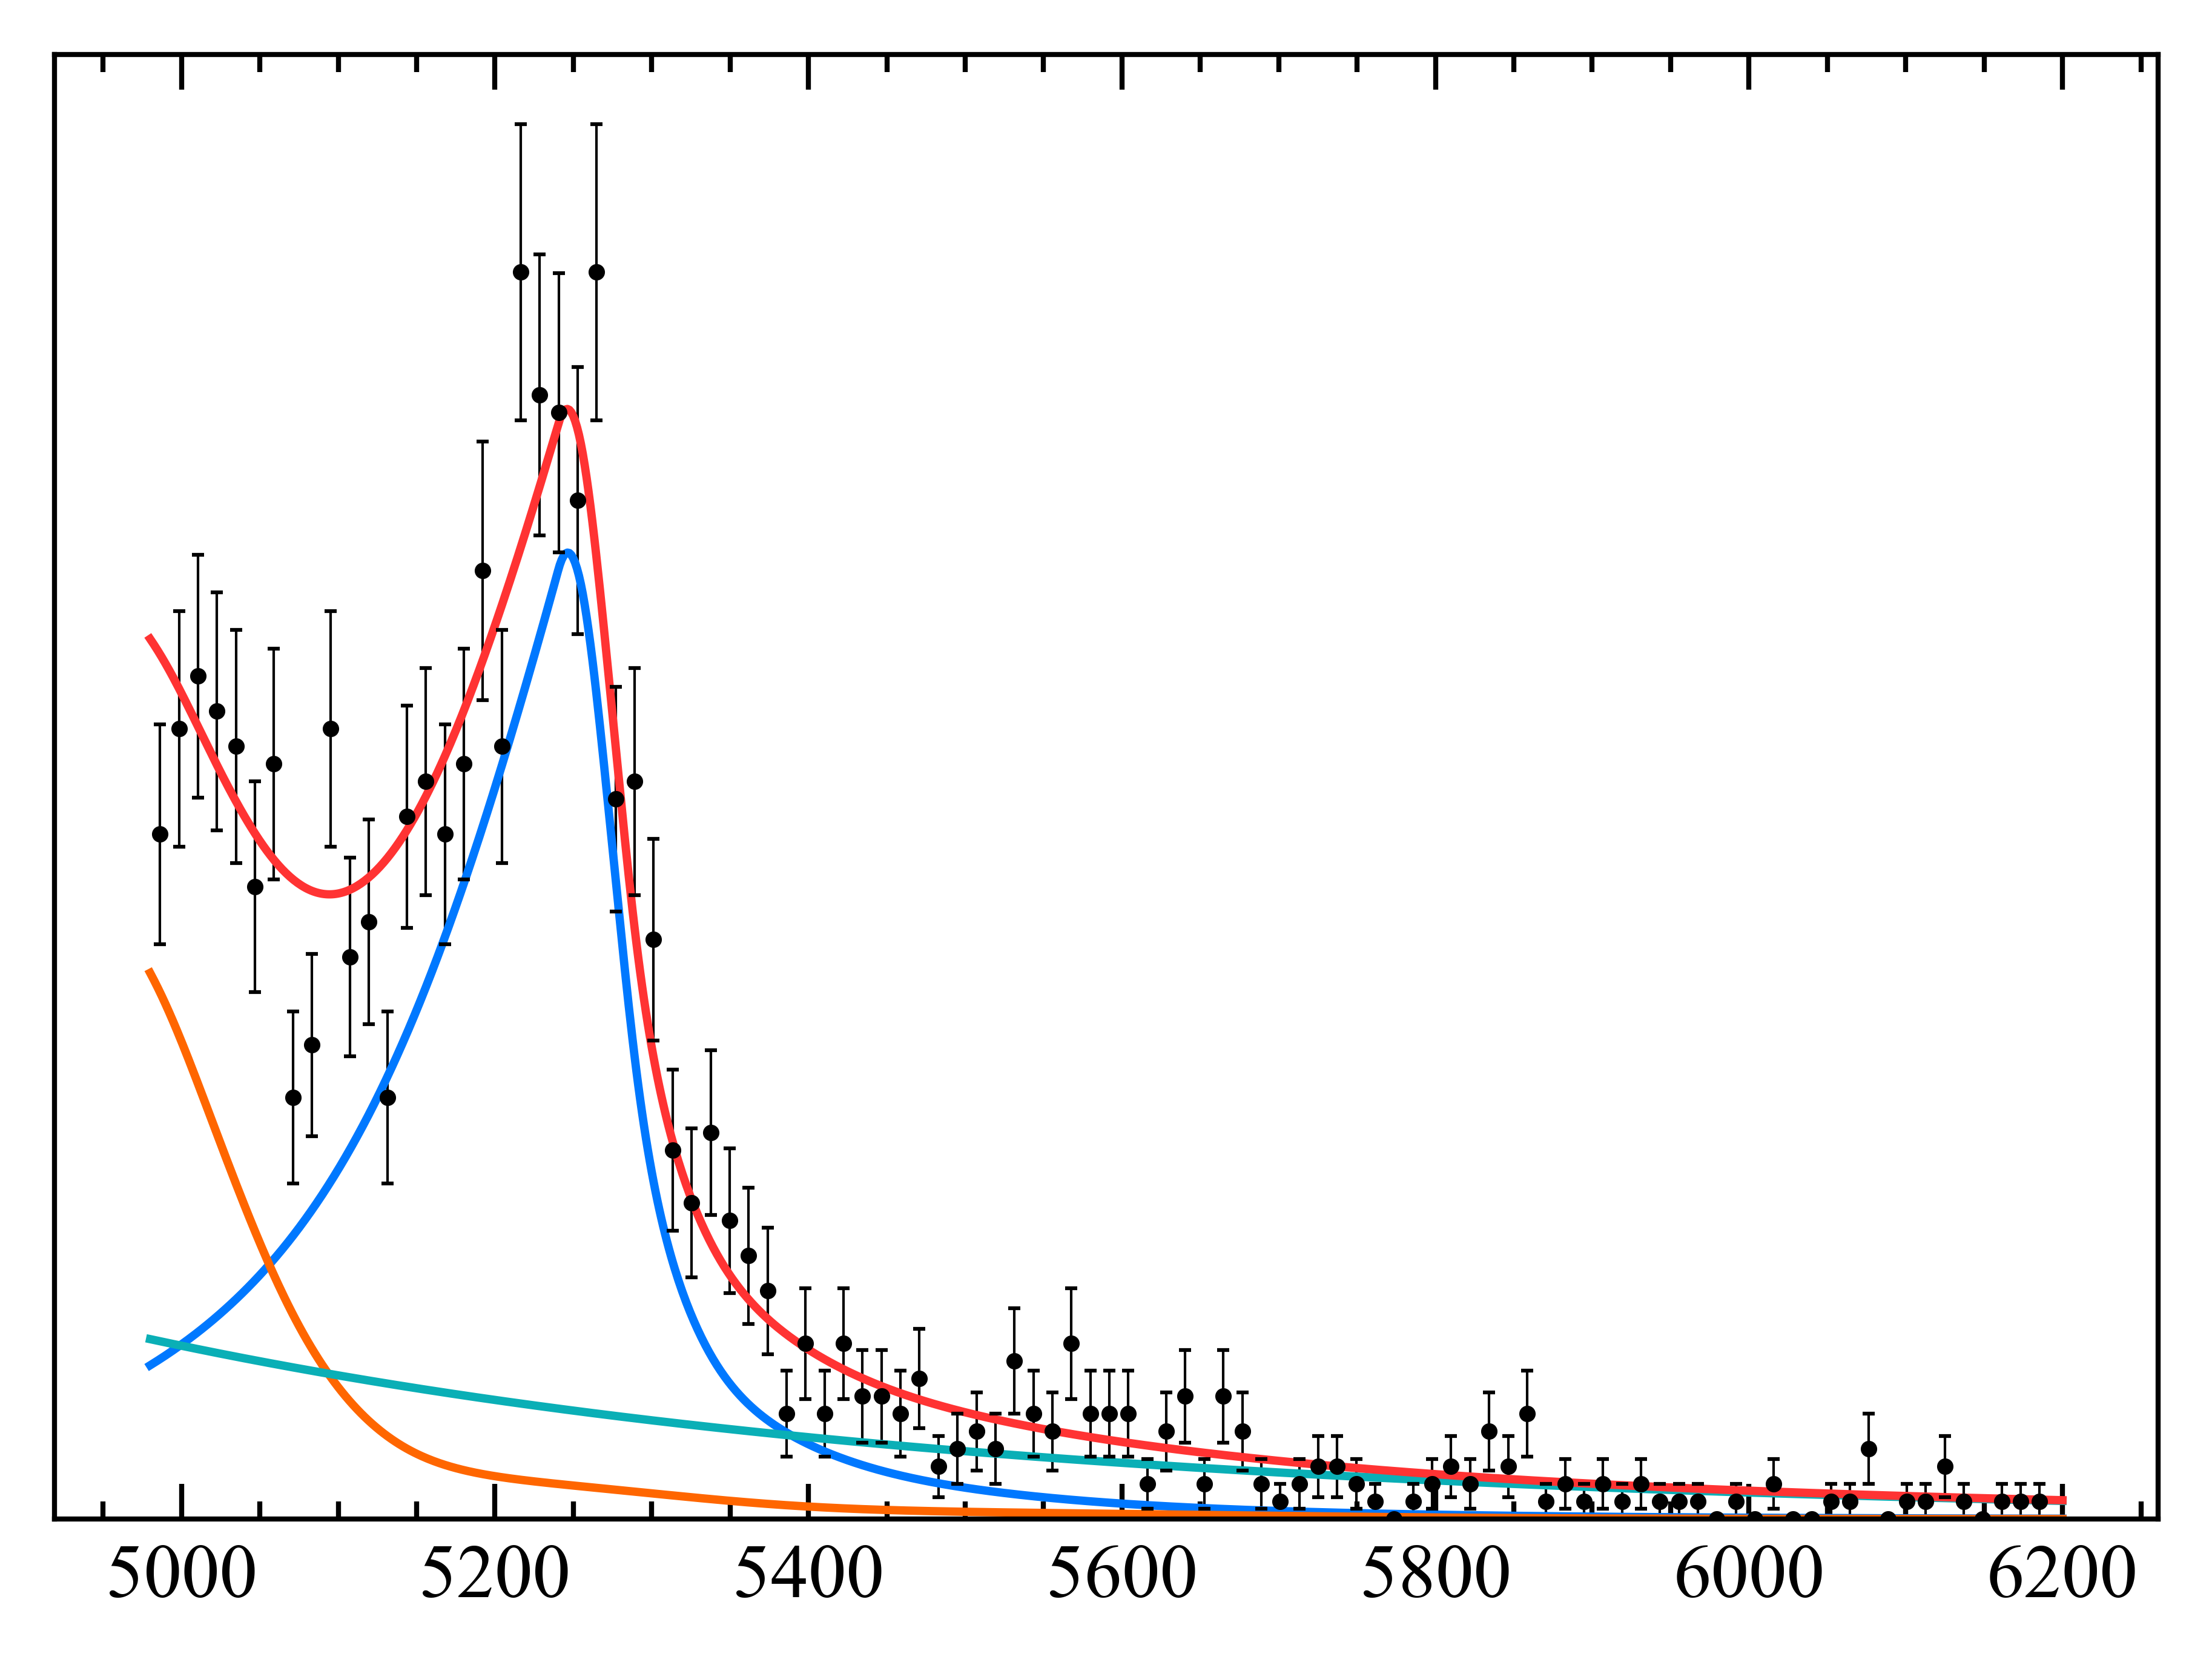

In [46]:
plot_comp_model(modelTot,data)

In [47]:
nTot=Ntot
nSig=0.3*nTot
nCombi=0.5*nTot
nPrc=0.2*nTot

In [49]:
#meanShift = zfit.Parameter('meanShift', 1.5, -5, 5)
meanShift = zfit.Parameter('meanShift', -4.84, floating=False)
#sigmaScale = zfit.Parameter('sigmaScale', 1.12, 1., 1.5)
sigmaScale = zfit.Parameter('sigmaScale', 1.12, floating=False)

def meanShift_fn(mean, shift):
    return mean+shift
def sigmaScale_fn(sigma, scale):
    return sigma*scale


In [50]:
mean0.floating = False
sigma0.floating = False
sigma20.floating = False

shiftedMean0 = zfit.ComposedParameter("shiftedMean0",meanShift_fn,params=[mean0, meanShift])
scaledSigma0 = zfit.ComposedParameter("scaledSigma0",sigmaScale_fn,params=[sigma0, sigmaScale])
scaledSigma20 = zfit.ComposedParameter("scaledSigma20",sigmaScale_fn,params=[sigma20, sigmaScale])

alpha_left0.floating = False
alpha_right0.floating = False
n_left0.floating = False
n_right0.floating = False



fracCB0.floating = False

cb10_fit = zfit.pdf.CrystalBall(obs=obs, mu=shiftedMean0, sigma=scaledSigma0, alpha=alpha_left0, n=n_left0)
cb20_fit = zfit.pdf.CrystalBall(obs=obs, mu=shiftedMean0, sigma=scaledSigma20, alpha=alpha_right0, n=n_right0)
sigModel0_fit = zfit.pdf.SumPDF([cb10_fit, cb20_fit], [fracCB0])



In [51]:
mean1.floating = False
sigma1.floating = False
sigma21.floating = False

shiftedMean1 = zfit.ComposedParameter("shiftedMean1",meanShift_fn,params=[mean1, meanShift])
scaledSigma1 = zfit.ComposedParameter("scaledSigma1",sigmaScale_fn,params=[sigma1, sigmaScale])
scaledSigma21 = zfit.ComposedParameter("scaledSigma21",sigmaScale_fn,params=[sigma21, sigmaScale])


alpha_left1.floating = False
alpha_right1.floating = False
n_left1.floating = False
n_right1.floating = False

sigma31.floating = False
scaledSigma31 = zfit.ComposedParameter("scaledSigma31",sigmaScale_fn,params=[sigma31, sigmaScale])
fracGaus1.floating = False
fracCB1.floating = False

cb11_fit = zfit.pdf.CrystalBall(obs=obs, mu=shiftedMean1, sigma=scaledSigma1, alpha=alpha_left1, n=n_left1)
cb21_fit = zfit.pdf.CrystalBall(obs=obs, mu=shiftedMean1, sigma=scaledSigma21, alpha=alpha_right1, n=n_right1)
sigGaus1_fit = zfit.pdf.Gauss(obs=obs, mu=shiftedMean1, sigma=scaledSigma31)
sigModelCB1_fit = zfit.pdf.SumPDF([cb11_fit, cb21_fit], [fracCB1])
sigModel1_fit = zfit.pdf.SumPDF([sigModelCB1_fit,sigGaus1_fit],[fracGaus1])



In [52]:
mean2.floating = False
sigma2.floating = False
sigma22.floating = False
shiftedMean2 = zfit.ComposedParameter("shiftedMean2",meanShift_fn,params=[mean2, meanShift])
scaledSigma2 = zfit.ComposedParameter("scaledSigma2",sigmaScale_fn,params=[sigma2, sigmaScale])
scaledSigma22 = zfit.ComposedParameter("scaledSigma22",sigmaScale_fn,params=[sigma22, sigmaScale])

alpha_left2.floating = False
alpha_right2.floating = False
n_left2.floating = False
n_right2.floating = False

sigma32.floating = False
scaledSigma32 = zfit.ComposedParameter("scaledSigma32",sigmaScale_fn,params=[sigma32, sigmaScale])
fracGaus2.floating = False
fracCB2.floating = False
fracCB2.floating = False

cb12_fit = zfit.pdf.CrystalBall(obs=obs, mu=shiftedMean2, sigma=scaledSigma2, alpha=alpha_left2, n=n_left2)
cb22_fit = zfit.pdf.CrystalBall(obs=obs, mu=shiftedMean2, sigma=scaledSigma22, alpha=alpha_right2, n=n_right2)
sigGaus2_fit = zfit.pdf.Gauss(obs=obs, mu=shiftedMean2, sigma=scaledSigma32)

sigModelCB2_fit = zfit.pdf.SumPDF([cb12_fit, cb22_fit], [fracCB2])
sigModel2_fit = zfit.pdf.SumPDF([sigModelCB2_fit,sigGaus2_fit],[fracGaus2])




In [53]:
frac0gamma_fit = zfit.Parameter("frac0gamma_fit", f0g, floating=True)
frac1gamma_fit = zfit.Parameter("frac1gamma_fit", f1g, floating=True)

In [54]:
frac0gammaConstraint = zfit.constraint.GaussianConstraint(frac0gamma_fit, observation=f0g , uncertainty=f0g*0.01 )
frac1gammaConstraint = zfit.constraint.GaussianConstraint(frac1gamma_fit, observation=f1g , uncertainty=f1g*0.01 )

In [55]:
sigModelTot_fit = zfit.pdf.SumPDF([sigModel0_fit, sigModel1_fit, sigModel2_fit], [frac0gamma_fit, frac1gamma_fit])
sigYield=zfit.Parameter('sigYield', nSig, 0, nTot)
sigModelTot_ext=sigModelTot_fit.create_extended(sigYield)

In [56]:
def prcYield_fn(sigYield, fracPrc):
    
    return sigYield*fracPrc
    
    

In [57]:
fracPrcVal=((BFKstee*effTotKstee)/(BFKee*effTotKee))
fracPrc=zfit.Parameter("fracPrc_fit", fracPrcVal, floating=True)
prcYield = zfit.ComposedParameter('prcYield', prcYield_fn, params=[fracPrc,sigYield])
part_reco.set_yield(prcYield)
prc_ext = part_reco

In [58]:
prcConstraint = zfit.constraint.GaussianConstraint(fracPrc, observation=fracPrcVal , uncertainty=fracPrcVal*0.05 )


In [59]:
lam_fit = zfit.Parameter('lambda_fit', -1e-3, -0.1, 0.001)
comb_bkg_fit = zfit.pdf.Exponential(lam_fit, obs=obs)
combYield=zfit.Parameter("combYield", nCombi, 0, nTot)
comb_bkg_fit_ext=comb_bkg_fit.create_extended(combYield)
#values = z.unstack_x(data)
#obs_right_tail = zfit.Space('B_plus_M', (5400, 6200))
#data_tail = zfit.Data.from_tensor(obs=obs_right_tail, tensor=values)
#with comb_bkg.set_norm_range(obs_right_tail):
#    nll_tail = zfit.loss.UnbinnedNLL(comb_bkg, data_tail)
#    minimizer.minimize(nll_tail)
#lam.floating = False
#lam    

In [60]:
modelTot_ext = zfit.pdf.SumPDF([sigModelTot_ext, comb_bkg_fit_ext, prc_ext])



In [61]:
nll_ext = zfit.loss.ExtendedUnbinnedNLL(modelTot_ext, data, constraints=[frac0gammaConstraint,frac1gammaConstraint])

In [75]:
result = minimizer.minimize(nll_ext)

In [76]:
print("gen value")
print("-------------")
print(np.around(NKee, decimals=3))
print(np.around(Ncomb, decimals=3))
print(np.around(fracPrcVal, decimals=5))
print(np.around(f0g,decimals=5))
print(np.around(f1g,decimals=5))
print(np.around(lam.value().numpy(),decimals=4))
print(np.around(shift,decimals=4))
print(np.around(scale,decimals=4))

gen value
-------------
856.96
406.095
0.29597
0.48628
0.44414
-0.0019
-5.0979
1.1232


In [82]:
print(result.params)

name                value    minuit_hesse    at limit
--------------  ---------  --------------  ----------
sigYield            942.9     +/-      56       False
combYield           381.8     +/-      73       False
fracPrc_fit        0.2028     +/-   0.042       False
frac0gamma_fit     0.4853     +/-  0.0048       False
frac1gamma_fit     0.4439     +/-  0.0044       False
lambda_fit      -0.002051     +/-  0.0004       False


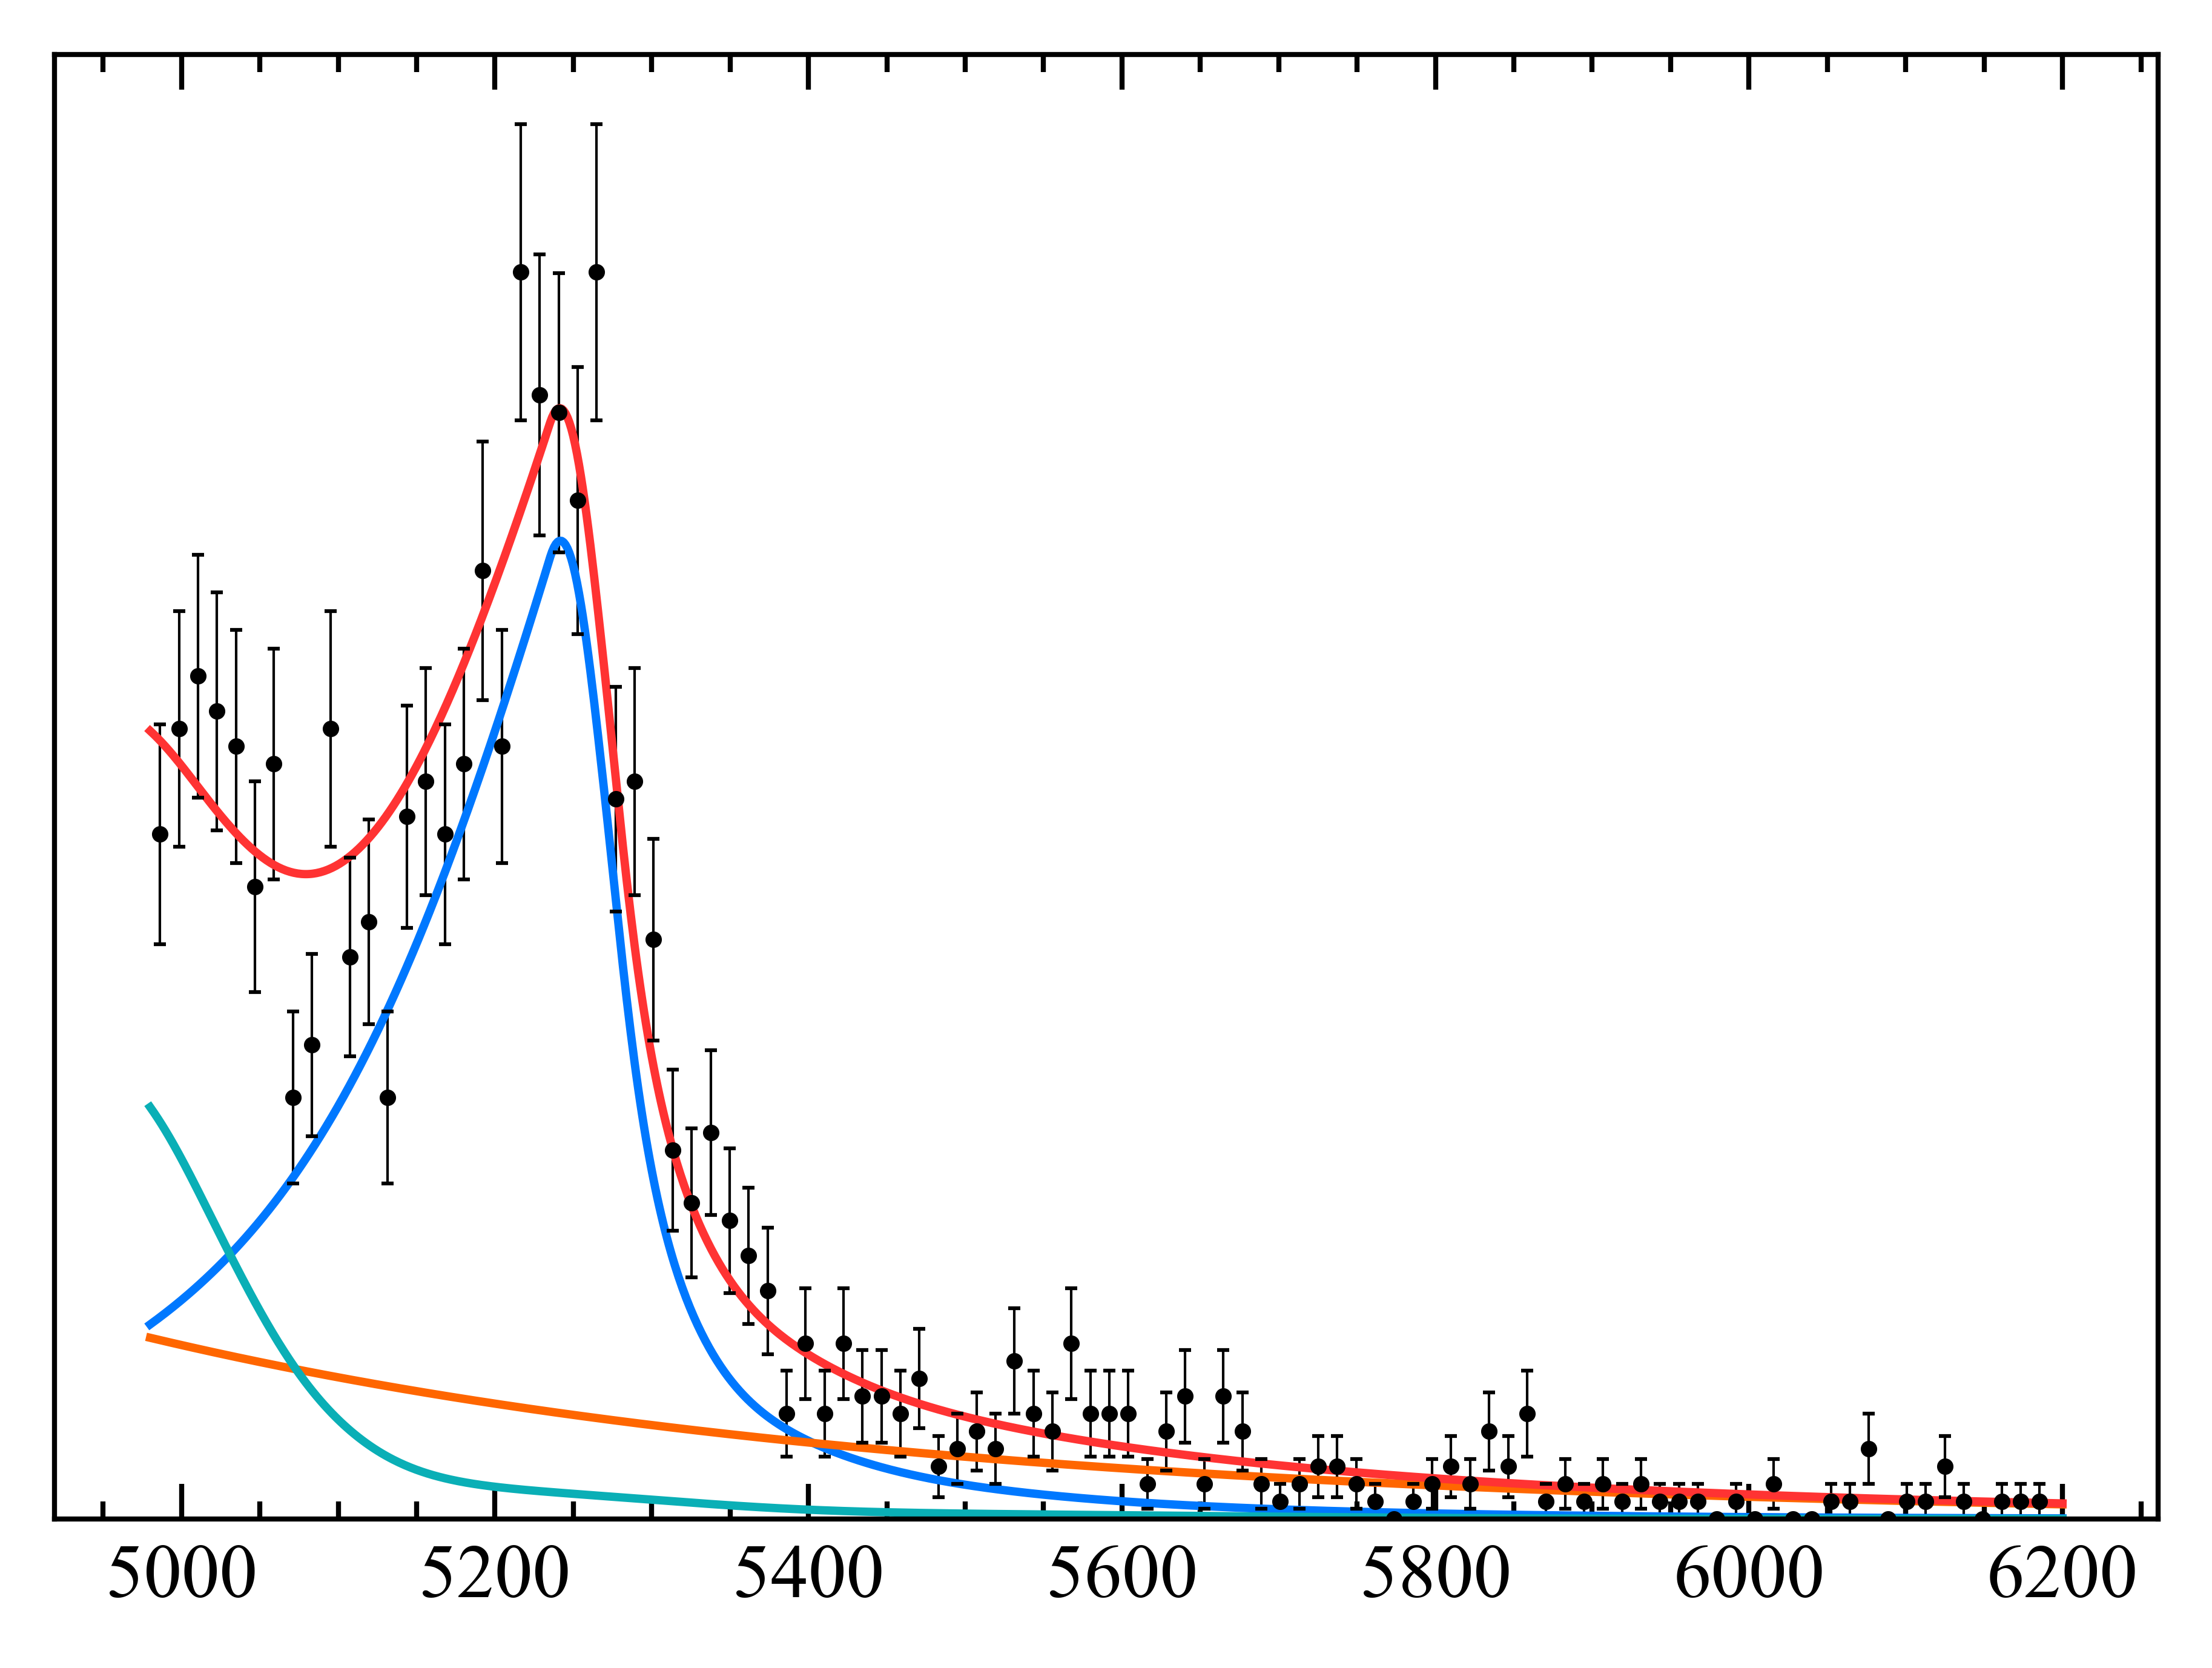

In [78]:
plot_comp_model(modelTot_ext,data)
   

In [79]:
fitResults ={}

In [85]:
print("Pull")
print("-------------")
for item in result.hesse().items():

    if item[0].name=='sigYield':
        fittedVal=np.abs(item[0].value().numpy())
        fittedError=item[1]['error']
        genVal=np.abs(NKee)
        pull = (fittedVal-genVal)/fittedError
#        print(item[0].name+' pull '+str(np.around(pull, decimals=3)))
        print(str(np.around(pull, decimals=3)))
        fitResults['sig_pull']=pull
        fitResults['sig_sensitivity']=fittedError/fittedVal
        
    if item[0].name=='combYield':
        fittedVal=np.abs(item[0].value().numpy())
        fittedError=item[1]['error']   
        genVal=np.abs(Ncomb)
        pull = (fittedVal-genVal)/fittedError
#        print(item[0].name+' pull '+str(np.around(pull, decimals=3)))     
        print(str(np.around(pull, decimals=3)))     
        fitResults['comb_pull']=pull
        
    if item[0].name=='fracPrc_fit':
        fittedVal=np.abs(item[0].value().numpy())
        fittedError=item[1]['error']
        genVal=np.abs(fracPrcVal)
        pull = (fittedVal-genVal)/fittedError           
#        print(item[0].name+' pull '+str(np.around(pull, decimals=3)))
        print(str(np.around(pull, decimals=3)))
        fitResults['fracPrc_pull']=pull
                
    if item[0].name=='frac0gamma_fit':
        fittedVal=np.abs(item[0].value().numpy())
        fittedError=item[1]['error']
        genVal=np.abs(frac0gamma.value().numpy())
        pull = (fittedVal-genVal)/fittedError
#        print(item[0].name+' pull '+str(np.around(pull, decimals=3)))
        print(str(np.around(pull, decimals=3)))
        fitResults['frac0gamma_pull']=pull
        
    if item[0].name=='frac1gamma_fit':
        fittedVal=np.abs(item[0].value().numpy())
        fittedError=item[1]['error']
        genVal=np.abs(frac1gamma.value().numpy())
        pull = (fittedVal-genVal)/fittedError
#        print(item[0].name+' pull '+str(np.around(pull, decimals=3)))
        print(str(np.around(pull, decimals=3)))
        fitResults['frac1gamma_pull']=pull


#    if item[0].name=='meanShift':
#        fittedVal=np.abs(item[0].value().numpy())
#        fittedError=item[1]['error']
#        genVal=np.abs(shift)
#        pull = (genVal-fittedVal)/fittedError 
##        print(item[0].name+' pull '+str(np.around(pull, decimals=3)))
#        print(str(np.around(pull, decimals=3)))
#        fitResults['meanShift_pull']=pull
#        
#    if item[0].name=='sigmaScale':
#        fittedVal=np.abs(item[0].value().numpy())
#        fittedError=item[1]['error']
#        genVal=np.abs(scale)
#        pull=(genVal-fittedVal)/fittedError         
##        print(item[0].name+' pull '+str(np.around(pull, decimals=3)))
#        print(str(np.around(pull, decimals=3)))
#        fitResults['sigmaScale_pull']=pull
        
    if item[0].name=='lambda_fit':
        fittedVal=np.abs(item[0].value().numpy())
        fittedError=item[1]['error']
        genVal=np.abs(lam.value().numpy())
        pull = (fittedVal-genVal)/fittedError         
#        print(item[0].name+' pull '+str(np.around(pull, decimals=3)))
        print(str(np.around(pull, decimals=3)))
        fitResults['lambda_pull']=pull        


Pull
-------------
1.529
-0.332
-2.229
-0.208
-0.045
0.44


In [81]:
(fracPrcVal-fittedVal)/fittedError                

728.7166069290366

In [67]:
import pickle

In [68]:
with open('fit_results_'+str(cut)+'.pickle', 'wb') as handle:
    pickle.dump(fitResults, handle, protocol=pickle.HIGHEST_PROTOCOL)


In [69]:
frac0gamma.value().numpy()

0.4862833619117737

In [10]:
import numpy as np
import matplotlib.pyplot as plt

In [15]:
np.log(np.linspace(4,19,20))/np.log(20)

array([0.46275643, 0.52288402, 0.57381634, 0.61799634, 0.65700661,
       0.69193128, 0.72354557, 0.75242306, 0.77900008, 0.80361626,
       0.82654116, 0.84799232, 0.86814783, 0.88715533, 0.90513857,
       0.92220233, 0.93843607, 0.95391682, 0.96871133, 0.98287788])